In [2]:
import pandas as pd
import numpy as np
import json
import os
import re


In [2]:
pd.set_option('display.max_colwidth', 200)

In [3]:
PATH = 'cosmetic_p.csv'
df = pd.read_csv(PATH, low_memory=False)
df.head(1)

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolatum, Glycerin, Isohexadecane, Microcrystalline Wax, Lanolin Alcohol, Citrus Aurantifolia (Lime) Extract, Sesamum Indicum (Sesame) Seed Oil, Eucalyptus ...",1,1,1,1,1


In [5]:
df.shape

(1472, 11)

In [ ]:
df['brand'].value_counts()

brand
CLINIQUE              79
SEPHORA COLLECTION    66
SHISEIDO              63
ORIGINS               54
MURAD                 47
                      ..
SON & PARK             1
MAKEUP ERASER          1
KAT VON D              1
NURSE JAMIE            1
DERMAFLASH             1
Name: count, Length: 116, dtype: int64

In [36]:
names_with_z=df[df['rank'] == 0]['brand']
list_names = names_with_z.tolist()
list_names

['LA MER',
 'SK-II',
 'CLINIQUE',
 'ESTÉE LAUDER',
 'FRESH',
 'MURAD',
 'KATE SOMERVILLE',
 'PHILOSOPHY',
 'PETER THOMAS ROTH',
 'GLAMGLOW',
 'FOREO',
 'ALGENIST',
 'EVE LOM',
 'DRUNK ELEPHANT',
 'BEAUTYBIO',
 'SHISEIDO',
 'SEPHORA COLLECTION',
 'MOROCCANOIL',
 'DERMAFLASH']

In [9]:
df['brand'].nunique()

116

In [11]:
# print out column names
df.columns.tolist()

['Label',
 'brand',
 'name',
 'price',
 'rank',
 'ingredients',
 'Combination',
 'Dry',
 'Normal',
 'Oily',
 'Sensitive']

In [18]:
print(df.dtypes)

Label           object
brand           object
name            object
price            int64
rank           float64
ingredients     object
Combination      int64
Dry              int64
Normal           int64
Oily             int64
Sensitive        int64
dtype: object


In [14]:
df.isna().sum().sort_values(ascending=False)

Label          0
brand          0
name           0
price          0
rank           0
ingredients    0
Combination    0
Dry            0
Normal         0
Oily           0
Sensitive      0
dtype: int64

In [28]:
labels = df['Label'].unique()
num_labels = df['Label'].nunique()
print(labels)
print(num_labels)

['Moisturizer' 'Cleanser' 'Treatment' 'Face Mask' 'Eye cream'
 'Sun protect']
6


# EDA Notes
----
**1. Column Names (11)**
- Label **(obj)** 
- brand **(obj)**  
- name(of product) **(obj)** 
- price **(int)**
- rank (rating 0 to 5) **(float)**
- ingredients **(obj)** 

 *(rest are types of skin):*

- combination **(int)**
- dry **(int)**
- normal **(int)**
- oily **(int)**
- sensitive **(int)**

**2. Number of Brands**
* 116 different Brands

**3. NA's in Dataset**
* **NO NA's** 
----
## Consider 0 & 1 Scale for Types of :
## **Whether or not the product is recommended for type fo skin**
## **0**: **Not** recommended
## **1**: **recommended**
----

**4. Types of Skin: Outcome (0 or 1)**

* **combination**
* **dry**
* **normal**
* **oily**
* **sensitive**

**5. Label: (Type of Product)---- (6)**
* Moisturizer
* Cleanser
* Treatment
* Face Mask
* Eye Cream
* Sun Protect





In [ ]:
# isolate skin columns 
skin_cols = ['Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']


In [ ]:
# separate into diff skin columns and get products for each skin and their ranks


# get products for each skin type

def products_for_skin(skin_cols, top=None, rank_ascending=False):
    output_cols = df[df[skin_cols] == 1][['brand', 'name', 'rank']].copy()


In [37]:
products_by_skin = (df.melt(
    id_vars = ['Label', 'brand', 'name', 'price', 'rank'],
    value_vars = skin_cols,
    var_name = 'skin_type',
    value_name = 'flag'

)
    .query('flag == 1')
    .assign(skin_type = lambda x: x['skin_type'].str.lower())
    .sort_values(['skin_type', 'rank'], ascending = [True, True])
    .reset_index(drop=True)
)
products_by_skin = products_by_skin.query("rank > 0")

products_by_skin.to_csv('products_by_skin_type.csv', index=False)

In [45]:
df2 = pd.read_csv('products_by_skin_type.csv')
df2['skin_type'].value_counts()
df2['rank'].max()

5.0

products_by_skin['skin_type'].value_counts()

In [38]:
products_by_skin['skin_type'].value_counts()

skin_type
combination    957
normal         952
dry            895
oily           886
sensitive      750
Name: count, dtype: int64

In [22]:
products_by_skin['rank'].describe()

count    4480.000000
mean        4.168594
std         0.580111
min         0.000000
25%         4.000000
50%         4.300000
75%         4.500000
max         5.000000
Name: rank, dtype: float64

In [23]:
products_by_skin['price'].describe()

count    4480.000000
mean       56.575893
std        45.803852
min         3.000000
25%        30.000000
50%        44.000000
75%        68.000000
max       345.000000
Name: price, dtype: float64

In [24]:
(products_by_skin.groupby(['skin_type', 'brand']).size().sort_values(ascending=False).groupby(level=0).head(5))

skin_type    brand             
combination  DR. JART+             38
sensitive    DR. JART+             38
normal       DR. JART+             38
dry          DR. JART+             37
combination  KIEHL'S SINCE 1851    37
normal       KIEHL'S SINCE 1851    37
oily         KIEHL'S SINCE 1851    37
normal       ORIGINS               36
dry          KIEHL'S SINCE 1851    35
oily         ORIGINS               34
combination  CLINIQUE              33
             ORIGINS               33
oily         DR. JART+             33
sensitive    KIEHL'S SINCE 1851    33
normal       SHISEIDO              31
dry          ORIGINS               31
             SHISEIDO              31
normal       PETER THOMAS ROTH     30
combination  PETER THOMAS ROTH     30
oily         PETER THOMAS ROTH     30
             CLINIQUE              30
sensitive    CAUDALIE              30
dry          PETER THOMAS ROTH     28
sensitive    FIRST AID BEAUTY      28
             PETER THOMAS ROTH     24
dtype: int64

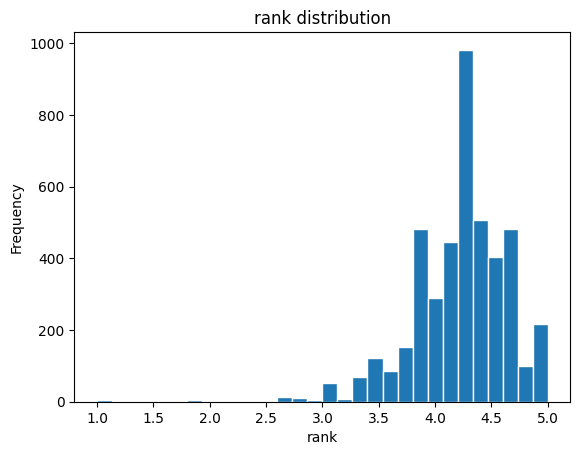

In [46]:
import matplotlib.pyplot as plt
df2['rank'].plot(kind='hist', bins=30,edgecolor='white')
plt.title('rank distribution')
plt.xlabel('rank')
plt.show()

In [47]:
df2 = pd.read_csv('products_by_skin_type.csv')
df2.head(5)

,Label,brand,name,price,rank,skin_type,flag
0,Face Mask,FOREO,Shimmer Freak Mask,19,1.0,combination,1
1,Eye cream,BOSCIA,Sake Brightening Bio-Cellulose Eye Masks,15,1.8,combination,1
2,Face Mask,SEPHORA COLLECTION,SUPERMASK - The Golden Mask,6,2.6,combination,1
3,Face Mask,EVE LOM,WHITE Brightening Mask,160,2.7,combination,1
4,Face Mask,SKIN LAUNDRY,Wrinkle Release Neck & Chest Sheet Mask,60,2.7,combination,1


In [39]:
df2['rank'].unique()

array([0. , 1. , 1.8, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. ])

In [3]:
df4 = pd.read_csv('cosmetic_p.csv')
df4.head(4)

,Label,brand,name,price,rank,ingredients,Combination,Dry,Normal,Oily,Sensitive
0,Moisturizer,LA MER,Crème de la Mer,175,4.1,"Algae (Seaweed) Extract, Mineral Oil, Petrolat...",1,1,1,1,1
1,Moisturizer,SK-II,Facial Treatment Essence,179,4.1,"Galactomyces Ferment Filtrate (Pitera), Butyle...",1,1,1,1,1
2,Moisturizer,DRUNK ELEPHANT,Protini™ Polypeptide Cream,68,4.4,"Water, Dicaprylyl Carbonate, Glycerin, Ceteary...",1,1,1,1,0
3,Moisturizer,LA MER,The Moisturizing Soft Cream,175,3.8,"Algae (Seaweed) Extract, Cyclopentasiloxane, P...",1,1,1,1,1


In [7]:
count_ing = (
    df4['ingredients'].dropna()
    .str.split(',')
    .explode()
    .str.strip()
    .replace(', pd.NA')
    .dropna()
    .value_counts()
    .rename_axis('ingredient')
    .reset_index(name='count')
)
count_ing.head(30)

/var/folders/m1/qw_q82j54pz1txf8_6ksbcy40000gn/T/ipykernel_42579/389719011.py:6: FutureWarning: Series.replace without 'value' and with non-dict-like 'to_replace' is deprecated and will raise in a future version. Explicitly specify the new values instead.
  .replace(', pd.NA')


,ingredient,count
0,Water,995
1,Glycerin,978
2,Phenoxyethanol,805
3,Butylene Glycol,786
4,Sodium Hyaluronate,471
5,Caprylyl Glycol,460
6,Dimethicone,440
7,Tocopheryl Acetate,415
8,Xanthan Gum,412
9,Ethylhexylglycerin,396


In [10]:
def keep_parens(s:str) -> str:
    if pd.isna(s):
        return s
    s = s.strip()
    s = re.sub(r'\s+', ' ', s)
    return s

counts_by_cat = (
    df4.dropna(subset=['ingredients', 'Label'])
    .assign(ingredient=df4['ingredients'].str.split(','))
    .explode('ingredient')
    .assign(ingredient=lambda d: d['ingredient'].str.strip().map(keep_parens))
    .replace({'ingredient': {': pd.NA'}})
    .dropna(subset=['ingredient'])
    .groupby(['Label', 'ingredient'])
    .size()
    .rename('count')
    .reset_index()
    .sort_values(['Label', 'count'], ascending=[True,False])
)

top20 = counts_by_cat.groupby('Label').head(20)
print(top20)

           Label         ingredient  count
1976    Cleanser              Water    200
766     Cleanser           Glycerin    161
256     Cleanser    Butylene Glycol    131
1387    Cleanser     Phenoxyethanol    127
448     Cleanser        Citric Acid     70
...          ...                ...    ...
12095  Treatment  Potassium Sorbate     59
10950  Treatment        Citric Acid     56
12107  Treatment        Propanediol     54
11594  Treatment           Linalool     53
12305  Treatment    Sodium Benzoate     53

[120 rows x 3 columns]


In [11]:
pivot = counts_by_cat.pivot_table(
    index='ingredient', columns='Label', values='count', fill_value=0
)

In [12]:
pivot

Label,Cleanser,Eye cream,Face Mask,Moisturizer,Sun protect,Treatment
ingredient,,,,,,
,0.0,1.0,0.0,1.0,1.0,1.0
(+/-):Titanium Dioxide (Ci 77891),0.0,0.0,1.0,0.0,0.0,0.0
(-)-Alpha-Bisabolol,0.0,0.0,1.0,0.0,0.0,0.0
(Bergamot) Fruit Oil,0.0,0.0,1.0,0.0,0.0,0.0
(Bilberry) Extract,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...
which is easily absorbed by the skin to provide supreme nourishment. -Echinacea Extract: Helps to improve the skin’s resilience to environmental aggressors and promote a radiant glow. -Vitamin E: Offers antioxidant protection against wrinkle-causing free radicals. -Chamomile Wax: Helps to decrease dry spots,0.0,0.0,0.0,1.0,0.0,0.0
while a powerful botanical blend of gingko biloba leaf extract,0.0,0.0,0.0,0.0,0.0,1.0
whose flower is Alkyl Acrylate Crosspolymer,0.0,0.0,1.0,0.0,0.0,0.0


In [19]:
# ingredients file

csv_path = 'cosmetic_p.csv'
cat_col = 'Label'
ing_col = 'ingredients'
skin_cols = ['Combination','Dry','Normal','Oily','Sensitive']

top_n_per_label = 50

def clean_list(s: str) -> str:
    if pd.isna(s):
        return s
    s = s.strip()
    s = re.sub(r'\s*/\s*','/', s) 
    s = re.sub(r'\s+', ' ', s)
    return s

def count_series(strings: pd.Series) -> pd.DataFrame:
    counts = strings.value_counts(dropna=False)
    df = counts.reset_index()
    df.columns = ['ingredient', 'count']
    df = df[df['ingredient'].notna()]
    return df.sort_values('count', ascending=False)

df = pd.read_csv(csv_path)

for c in skin_cols:
    if c not in df.columns:
        df[c] = 0

expl = (
    df.dropna(subset=[ing_col, cat_col]).copy()             
)
expl['ingredients'] = expl[ing_col].astype(str).apply(lambda x: [clean_list(i) for i in x.split(',')])

expl = expl.explode('ingredients', ignore_index=True)
expl['ingredients'] = expl['ingredients'].str.strip()
expl = expl[expl['ingredients'].ne('')]

# top ingredienter/label
counts_by_label = (
    expl.groupby([cat_col, 'ingredients'])
    .size()
    .rename('count')
    .reset_index()
    .sort_values([cat_col, 'count'], ascending=[True, False])
)

# within label
totals = counts_by_label.groupby(cat_col)['count'].transform('sum')
counts_by_label['share'] = counts_by_label['count'] / totals

#save table
counts_by_label.to_csv('top_ingredients_by_label.csv', index=False)

# csv per label
for label, grp in counts_by_label.groupby(cat_col):
    grp.head(top_n_per_label).to_csv(f'top_ingredients_{label}.csv', index=False)

print('saved: top_ingredients_by_label.csv')
print(counts_by_label.head(10))

saved: top_ingredients_by_label.csv
         Label         ingredients  count     share
1972  Cleanser               Water    200  0.028885
764   Cleanser            Glycerin    161  0.023252
256   Cleanser     Butylene Glycol    131  0.018920
1384  Cleanser      Phenoxyethanol    127  0.018342
446   Cleanser         Citric Acid     70  0.010110
328   Cleanser     Caprylyl Glycol     65  0.009388
635   Cleanser       Disodium Edta     56  0.008088
717   Cleanser           Fragrance     55  0.007943
1034  Cleanser            Linalool     50  0.007221
1877  Cleanser  Tocopheryl Acetate     50  0.007221


In [20]:
skin_counts = []
for skin in skin_cols:
    sub = expl[expl[skin] == 1]
    if sub.empty:
        continue
    cnt = (sub.groupby('ingredients')
           .size()
           .rename('count')
           .reset_index()
           .sort_values('count', ascending=False )
    )
    cnt['skin_type'] = skin
    total_mentions = cnt['count'].sum() 
    cnt['share'] = cnt['count'] / total_mentions    
    skin_counts.append(cnt) 

counts_by_skin = pd.concat(skin_counts, ignore_index=True)  
counts_by_skin = counts_by_skin[['skin_type', 'ingredients', 'count', 'share']].sort_values(['skin_type', 'count'], ascending=[True, False])

top_n_per_skin = 50
counts_by_skin.to_csv('top_ingredients_by_skin.csv', index=False)
for skin, grp in counts_by_skin.groupby('skin_type'):
    grp.head(top_n_per_skin).to_csv(f'top_ingredients_{skin}.csv', index=False)

print('saved: top_ingredients_by_skin.csv')


saved: top_ingredients_by_skin.csv


In [26]:
# ingredients for each brand and product
df = pd.read_csv('cosmetic_p.csv')

name_col = 'name'
label_col = 'Label'

cols_keep = ['product_id', 'brand', name_col, label_col, 'ingredients'] + skin_cols

for c in skin_cols:
    if c not in df.columns: df[c] = 0
    df[c] = pd.to_numeric(df[c], errors='coerce').fillna(0).astype(int)

if 'product_id' not in df.columns:
    df = df.reset_index().rename(columns={'index':'product_id'})

prod_ing = (
    df.dropna(subset=['ingredients'])
    .assign(ingredients=df['ingredients'].astype(str).str.split(','))
    .explode('ingredients', ignore_index=True)
)
prod_ing['ingredients'] = prod_ing['ingredients'].map(clean_list).str.strip()
prod_ing = prod_ing[prod_ing['ingredients'].ne('')]
cols_keep = ['product_id', 'brand', name_col, label_col, 'ingredients'] + \
    [c for c in skin_cols if c in df.columns]

prod_ing = prod_ing[cols_keep]

top_n = 30

# top ingredients per label
counts_by_label = (
    prod_ing.groupby(['Label', 'ingredients'])
    .size()
    .rename('count')
    .reset_index()
    .sort_values(['Label', 'count'], ascending=[True, False])
)

for lab, grp in counts_by_label.groupby('Label'):
    print(f'\nTop {top_n }ingredients for label: {lab}')
    print(grp.head(top_n)[['ingredients', 'count']].to_string(index=False))

print('Top ingredients per skin type')
for skin in skin_cols:
    sub = prod_ing[prod_ing[skin] == 1]
    if sub.empty:
        continue
    counts_by_skin = (
        sub.groupby('ingredients')
        .size()
        .rename('count')
        .reset_index()
        .sort_values('count', ascending=False)
    )
    print(f'\nTop {top_n} ingredients for skin type: {skin}')
    print(counts_by_skin.head(top_n)[['ingredients', 'count']].to_string(index=False))







    


Top 30ingredients for label: Cleanser
                   ingredients  count
                         Water    200
                      Glycerin    161
               Butylene Glycol    131
                Phenoxyethanol    127
                   Citric Acid     70
               Caprylyl Glycol     65
                 Disodium Edta     56
                     Fragrance     55
                      Linalool     50
            Tocopheryl Acetate     50
                      Limonene     49
            Sodium Hyaluronate     49
               Sodium Chloride     48
            Ethylhexylglycerin     47
              Sodium Hydroxide     47
               Sodium Benzoate     45
                   Xanthan Gum     44
             Potassium Sorbate     43
        Cocamidopropyl Betaine     40
                    Tocopherol     40
                 Disodium EDTA     38
                Polysorbate 20     37
             Glyceryl Stearate     34
                 Chlorphenesin     32
           

In [24]:
print('name_col =', name_col, type(name_col))
print('label_col =', label_col, type(label_col))
print('cols_keep =', cols_keep)
print('DataFrame columns =', list(prod_ing.columns))

name_col = [] <class 'list'>
label_col = [] <class 'list'>
cols_keep = ['product_id', 'brand', [], [], 'ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']
DataFrame columns = ['product_id', 'Label', 'brand', 'name', 'price', 'rank', 'ingredients', 'Combination', 'Dry', 'Normal', 'Oily', 'Sensitive']


In [25]:
assert name_col in prod_ing.columns, f"'{name_col}' not in columns"
assert label_col in prod_ing.columns, f"'{label_col}' not in columns"

TypeError: unhashable type: 'list'

In [27]:
import pandas as pd, re

CSV_PATH = 'cosmetic_p.csv'   # change path if needed
TOPN = 15                     # how many “top” ingredients you want per brand/product

def clean_keep_parens(s):
    if pd.isna(s): return s
    s = s.strip()
    s = re.sub(r'\s*/\s*', '/', s)   # "Aqua / Eau" -> "Aqua/Eau"
    s = re.sub(r'\s+', ' ', s)
    return s

# --- load ---
df = pd.read_csv(CSV_PATH)
if 'product_id' not in df.columns:
    df = df.reset_index().rename(columns={'index':'product_id'})

# --- explode to one (product, ingredient) per row; also keep original order ---
prod_ing = (
    df.dropna(subset=['ingredients'])
      .assign(_list=df['ingredients'].astype(str).str.split(','))
      .explode('_list', ignore_index=True)
      .rename(columns={'_list':'ingredient'})
)
prod_ing['ingredient'] = prod_ing['ingredient'].map(clean_keep_parens).str.strip()
prod_ing = prod_ing[prod_ing['ingredient'].ne('')]
prod_ing['ord'] = prod_ing.groupby('product_id').cumcount()  # 0 = first in list

# keep just what we need
prod_ing = prod_ing[['product_id','brand','name','Label','ingredient','ord']]

# =========================
# A) TOP INGREDIENTS — BY BRAND (across that brand’s products)
# =========================
brand_ing_counts = (
    prod_ing.groupby(['brand','ingredient'])
            .size().rename('count').reset_index()
            .sort_values(['brand','count'], ascending=[True, False])
)
# within-brand share (so big brands are comparable)
brand_totals = brand_ing_counts.groupby('brand')['count'].transform('sum')
brand_ing_counts['share'] = brand_ing_counts['count'] / brand_totals

# save full tall table + one CSV per brand with TopN
brand_ing_counts.to_csv('brand_ingredient_counts.csv', index=False)
for brand, grp in brand_ing_counts.groupby('brand'):
    grp.head(TOPN).to_csv(f'brand_top{TOPN}_ingredients__{brand}.csv', index=False)

# quick print preview
for brand, grp in brand_ing_counts.groupby('brand'):
    print(f'\n=== {brand} — Top {TOPN} ingredients ===')
    print(grp.head(TOPN)[['ingredient','count']].to_string(index=False))

# (optional) brand × ingredient wide table (counts)
brand_ing_wide = (
    brand_ing_counts.pivot_table(index='brand', columns='ingredient', values='count', fill_value=0)
                   .sort_index()
                   .reset_index()
)
brand_ing_wide.to_csv('brand_ingredient_counts_wide.csv', index=False)

# =========================
# B) TOP INGREDIENTS — BY PRODUCT
# two notions of “top”:
#   (B1) first N by ORIGINAL ORDER on the label (proxy for concentration)
#   (B2) top N by how COMMON the ingredient is ACROSS the whole catalog
# =========================

# (B1) first N by original order, per product
top_by_order_all = (prod_ing[prod_ing['ord'] < TOPN]
                    .sort_values(['product_id','ord']))
top_by_order_all.to_csv(f'product_top{TOPN}_by_order.csv', index=False)

# print a compact preview
for pid, grp in top_by_order_all.groupby('product_id'):
    brand = grp['brand'].iloc[0]; name = grp['name'].iloc[0]
    print(f'\n{brand} — {name} | first {TOPN} by order')
    print(grp[['ord','ingredient']].to_string(index=False))

# (B2) top N by global commonness (within the dataset)
global_support = (prod_ing.groupby('ingredient')['product_id']
                  .nunique().rename('global_support').reset_index())
p2 = prod_ing.merge(global_support, on='ingredient', how='left')
top_by_common_all = (p2.sort_values(['product_id','global_support'], ascending=[True, False])
                       .groupby('product_id').head(TOPN))
top_by_common_all.to_csv(f'product_top{TOPN}_by_global_commonness.csv', index=False)

# optional preview
for pid, grp in top_by_common_all.groupby('product_id'):
    brand = grp['brand'].iloc[0]; name = grp['name'].iloc[0]
    print(f'\n{brand} — {name} | top {TOPN} by dataset commonness')
    print(grp[['ingredient','global_support']].to_string(index=False))

# =========================
# C) QUICK HELPERS (on-demand lookups)
# =========================
def top_ingredients_for_brand(brand, topn=TOPN):
    g = brand_ing_counts[brand_ing_counts['brand'].str.fullmatch(re.escape(brand), case=False)]
    return g.head(topn)[['ingredient','count','share']]

def top_ingredients_for_product(brand=None, name_substr=None, product_id=None, topn=TOPN, mode='order'):
    """
    mode='order'  -> first N by label order
    mode='common' -> top N by global commonness
    """
    sub = prod_ing
    if product_id is not None:
        sub = sub[sub['product_id'] == product_id]
    if brand is not None:
        sub = sub[sub['brand'].str.contains(str(brand), case=False, na=False)]
    if name_substr is not None:
        sub = sub[sub['name'].str.contains(str(name_substr), case=False, na=False)]
    if sub.empty: 
        return pd.DataFrame()

    pid = sub['product_id'].iloc[0]
    rows = p2[p2['product_id'] == pid].copy()  # has global_support merged
    if mode == 'order':
        out = rows.sort_values('ord').head(topn)
        return out[['brand','name','Label','ord','ingredient']]
    else:
        out = rows.sort_values('global_support', ascending=False).head(topn)
        return out[['brand','name','Label','ingredient','global_support']]

# EXAMPLES:
# print(top_ingredients_for_brand('LA MER', topn=20).to_string(index=False))
# print(top_ingredients_for_product(brand='LA MER', name_substr='Crème', topn=15, mode='order'))
# print(top_ingredients_for_product(brand='LA MER', name_substr='Crème', topn=15, mode='common'))



=== ALGENIST — Top 15 ingredients ===
                  ingredient  count
                    Glycerin     26
                       Water     24
             Caprylyl Glycol     23
             Butylene Glycol     22
              Phenoxyethanol     22
    Algae Exopolysaccharides     21
                 Dimethicone     19
               Disodium EDTA     19
          Ethylhexylglycerin     16
Caprylic/Capric Triglyceride     15
           Potassium Sorbate     15
            Pentylene Glycol     14
             Hexylene Glycol     12
             Sodium Benzoate     12
            Sodium Hydroxide     12

=== AMOREPACIFIC — Top 15 ingredients ===
                     ingredient  count
                Butylene Glycol     19
                        Alcohol     16
                  Disodium Edta     15
                       Glycerin     15
                          Water     15
                 Phenoxyethanol     14
 Camellia Sinensis Leaf Extract     13
                     Fragrance

In [28]:
## top ingredients for each skin type (Active ingredients)

actives = {
    'Oily' :['Salicylic Acid','Niacinamide','Clay','Kaolin','Bentonite','Green Tea',
        'Retinol','Sulfur','Zinc','Tea Tree','Glycolic Acid','Lactic Acid'
    ],
    'Combination': [
        'Hyaluronic Acid','Niacinamide','Salicylic Acid','Vitamin C','Green Tea',
        'Retinol','Ceramides','Glycolic Acid','Lactic Acid','Azelaic Acid'
    ],
    'Dry': [
        'Hyaluronic Acid','Glycerin','Ceramides','Shea Butter','Squalane',
        'Aloe Vera','Urea','Vitamin E','Jojoba Oil','Panthenol','Lactic Acid'
    ],
    'Sensitive': [
        'Ceramides','Hyaluronic Acid','Niacinamide','Squalane','Aloe Vera',
        'Chamomile','Oatmeal','Bisabolol','Centella Asiatica','Panthenol',
        'Green Tea','Shea Butter','Azelaic Acid','Allantoin','Zinc Oxide'
    ],
    'Normal': [
        'Hyaluronic Acid','Vitamin C','Niacinamide','Ceramides','Retinol',
        'Peptides','Glycolic Acid','Lactic Acid','Green Tea','Squalane',
        'Vitamin E','Aloe Vera','AHAs','Benzoyl Peroxide'
    ]
}

# regex variants so "expected" matches common names in your CSV
variant_patterns = {
    'Hyaluronic Acid': r'(hyaluronic acid|sodium hyaluronate)\b',
    'Vitamin C': r'(vitamin c|ascorbic acid|ascorbyl|magnesium ascorbyl phosphate|sodium ascorbyl phosphate)\b',
    'Vitamin E': r'(vitamin e|tocopherol|tocopheryl acetate)\b',
    'Niacinamide': r'(niacinamide|nicotinamide)\b',
    'Retinol': r'(retinol|retinal(dehyde)?|retinyl (palmitate|acetate))\b',
    'Retinoid': r'(retinoid|retinol|retinal(dehyde)?|granactive retinoid|hydroxypinacolone retinoate|bakuchiol)\b',
    'Peptides': r'peptid',  # substring matches multiple peptide forms
    'Glycolic Acid': r'\bglycolic acid\b',
    'Lactic Acid': r'\blactic acid\b',
    'Poly Hydroxy Acids': r'(gluconolactone|lactobionic acid)\b',
    'Salicylic Acid': r'(salicylic acid|beta hydroxy|willow bark)\b',
    'Azelaic Acid': r'\bazelaic acid\b',
    'Ceramides': r'ceramide',  # catches Ceramide NP/AP/EOP etc.
    'Squalane': r'\bsqualane\b',
    'Shea Butter': r'(shea butter|butyrospermum parkii)\b',
    'Aloe Vera': r'(aloe vera|aloe barbadensis)\b',
    'Green Tea': r'(green tea|camellia sinensis)\b',
    'Tea Tree': r'(tea tree|melaleuca alternifolia)\b',
    'Zinc': r'(zinc pca|zinc gluconate|zinc sulfate)(?!.*oxide)',  # avoid zinc oxide unless asked
    'Zinc Oxide': r'\bzinc oxide\b',
    'Urea': r'\burea\b',
    'Panthenol': r'(panthenol|pantothenic acid)\b',
    'Allantoin': r'\ballantoin\b',
    'Kojic Acid': r'\bkojic acid\b',
    'Bakuchiol': r'\bbakuchiol\b',
    'Bisabolol': r'\bbisabolol\b',
    'Centella Asiatica': r'(centella asiatica|madecassoside|asiaticoside|madecassic acid|asiatic acid)\b',
    'Chamomile': r'(chamomil|anthemis nobilis|chamaemelum nobile|matricaria)\b',
    'Calendula': r'\bcalendula\b',
    'Oatmeal': r'(oat|avena sativa)\b',
    'Jojoba Oil': r'(jojoba|simmondsia chinensis)\b',
    'Avocado Oil': r'(avocado|persea gratissima)\b',
    'Clay': r'(kaolin|bentonite)\b',
    'Kaolin': r'\bkaolin\b',
    'Bentonite': r'\bbentonite\b',
    'Sulfur': r'\bsulfur\b',
    'Benzoyl Peroxide': r'\bbenzoyl peroxide\b',
    'Essential Oils': r'(oil)$',  # broad; refine if noisy
    'Caffeine': r'\bcaffeine\b',
    'Antioxidant': r'antioxid',   # broad keyword
}

def pattern_for(term):
    return variant_patterns.get(term, re.escape(term))

rows = []
for skin, expected_list in actives.items():
    path = f'active_counts__{skin}.csv'
    if not os.path.exists(path):
        print(f'[skip] No file found for {skin}: {path}')
        continue
    data = pd.read_csv(path)  # columns: ingredient, count, share, skin_type, active_bucket
    for term in expected_list:
        pat = pattern_for(term)
        mask = data['ingredient'].str.contains(pat, case=False, regex=True, na=False)
        found = data[mask]
        total_count = int(found['count'].sum()) if not found.empty else 0
        total_share = float(found['share'].sum()) if not found.empty else 0.0
        rows.append({
            'skin_type': skin,
            'expected_ingredient': term,
            'found': bool(total_count > 0),
            'count': total_count,
            'share': total_share
        })
        if total_count > 0:
            print(f"{skin:10s} ✅ {term:22s}  count={total_count:4d}  share={total_share:.4f}")
        else:
            print(f"{skin:10s} ❌ {term:22s}  NOT found")

summary = pd.DataFrame(rows).sort_values(['skin_type','found','count'], ascending=[True, False, False])
summary.to_csv('expected_vs_found_by_skin.csv', index=False)
print("\nSaved: expected_vs_found_by_skin.csv")


[skip] No file found for Oily: active_counts__Oily.csv
[skip] No file found for Combination: active_counts__Combination.csv
[skip] No file found for Dry: active_counts__Dry.csv
[skip] No file found for Sensitive: active_counts__Sensitive.csv
[skip] No file found for Normal: active_counts__Normal.csv


KeyError: 'skin_type'

In [31]:
# products_actives_price_analysis.py
import pandas as pd, numpy as np, re

CSV_PATH = 'cosmetic_p.csv'   # change if needed
SKINS = ['Combination','Dry','Normal','Oily','Sensitive']

# ---------------- Expected lists (edit as you like) ----------------
EXPECTED = {
    'Combination': ['Hyaluronic Acid','Niacinamide','Salicylic Acid','Vitamin C','Green Tea',
                    'Retinol','Ceramides','Glycolic Acid','Lactic Acid','Azelaic Acid','Coconut Oil'],
    'Dry': ['Hyaluronic Acid','Glycerin','Ceramides','Shea Butter','Squalane','Aloe Vera',
            'Niacinamide','Urea','Vitamin E','Avocado Oil','Jojoba Oil','Lactic Acid',
            'Panthenol','Evening Primrose Oil'],
    'Sensitive': ['Ceramides','Hyaluronic Acid','Niacinamide','Squalane','Aloe Vera','Chamomile','Oatmeal',
                  'Bisabolol','Jojoba Oil','Panthenol','Centella Asiatica','Green Tea','Shea Butter','Vitamin C',
                  'Calendula','Azelaic Acid','Bakuchiol','Retinol','Allantoin','Glycerin','Vitamin E','Zinc Oxide'],
    'Normal': ['Hyaluronic Acid','Vitamin C','Niacinamide','Ceramides','Retinol','Peptides','Glycolic Acid',
               'Lactic Acid','Aloe Vera','Green Tea','Vitamin E','Azelaic Acid','Benzoyl Peroxide','Glycerin',
               'Kojic Acid','Poly Hydroxy Acids','Retinoid','Shea Butter','Squalane','AHAs','Antioxidant','Caffeine','Essential Oils'],
    'Oily': ['Salicylic Acid','Niacinamide','Clay','Kaolin','Bentonite','Hyaluronic Acid','Green Tea',
             'Retinol','Sulfur','Zinc','Glycolic Acid','Lactic Acid','Tea Tree']
}

# ---------------- Robust synonym/variant patterns ----------------
VAR = {
    'Hyaluronic Acid': r'(hyaluronic acid|sodium hyaluronate)\b',
    'Vitamin C': r'(vitamin c|ascorbic acid|ascorbyl|magnesium ascorbyl phosphate|sodium ascorbyl phosphate)\b',
    'Vitamin E': r'(vitamin e|tocopherol|tocopheryl acetate)\b',
    'Niacinamide': r'(niacinamide|nicotinamide)\b',
    'Retinol': r'(retinol|retinal(dehyde)?|retinyl (palmitate|acetate))\b',
    'Retinoid': r'(retinoid|retinol|retinal(dehyde)?|granactive retinoid|hydroxypinacolone retinoate|bakuchiol)\b',
    'Peptides': r'peptid',
    'Glycolic Acid': r'\bglycolic acid\b',
    'Lactic Acid': r'\blactic acid\b',
    'Poly Hydroxy Acids': r'(gluconolactone|lactobionic acid)\b',
    'Salicylic Acid': r'(salicylic acid|beta hydroxy|willow bark)\b',
    'Azelaic Acid': r'\bazelaic acid\b',
    'Ceramides': r'ceramide',
    'Squalane': r'\bsqualane\b',
    'Shea Butter': r'(shea butter|butyrospermum parkii)\b',
    'Aloe Vera': r'(aloe vera|aloe barbadensis)\b',
    'Green Tea': r'(green tea|camellia sinensis)\b',
    'Tea Tree': r'(tea tree|melaleuca alternifolia)\b',
    'Zinc': r'(zinc pca|zinc gluconate|zinc sulfate)(?!.*oxide)',
    'Zinc Oxide': r'\bzinc oxide\b',
    'Urea': r'\burea\b',
    'Panthenol': r'(panthenol|pantothenic acid)\b',
    'Allantoin': r'\ballantoin\b',
    'Kojic Acid': r'\bkojic acid\b',
    'Bakuchiol': r'\bbakuchiol\b',
    'Bisabolol': r'\bbisabolol\b',
    'Centella Asiatica': r'(centella asiatica|madecassoside|asiaticoside|madecassic acid|asiatic acid)\b',
    'Chamomile': r'(chamomil|anthemis nobilis|chamaemelum nobile|matricaria)\b',
    'Calendula': r'\bcalendula\b',
    'Oatmeal': r'(oat|avena sativa)\b',
    'Jojoba Oil': r'(jojoba|simmondsia chinensis)\b',
    'Avocado Oil': r'(avocado|persea gratissima)\b',
    'Clay': r'(kaolin|bentonite)\b',
    'Kaolin': r'\bkaolin\b',
    'Bentonite': r'\bbentonite\b',
    'Sulfur': r'\bsulfur\b',
    'Benzoyl Peroxide': r'\bbenzoyl peroxide\b',
    'Essential Oils': r'oil\b',
    'Caffeine': r'\bcaffeine\b',
    'Antioxidant': r'antioxid',
    'Coconut Oil': r'(coconut|cocos nucifera)\b',
    'Evening Primrose Oil': r'(evening primrose|oenothera biennis)\b',
    'AHAs': r'\b(alpha hydroxy|AHA)s?\b',
}
def pat(term): return VAR.get(term, re.escape(term))

# ---------------- Load & explode ingredients ----------------
def clean(s):
    if pd.isna(s): return s
    s = str(s).strip()
    s = re.sub(r'\s*/\s*', '/', s)  # "Aqua / Eau" -> "Aqua/Eau"
    s = re.sub(r'\s+', ' ', s)
    return s

df = pd.read_csv(CSV_PATH)
if 'product_id' not in df.columns:
    df = df.reset_index().rename(columns={'index':'product_id'})

# cast price to numeric if needed
if 'price' in df.columns:
    df['price'] = pd.to_numeric(df['price'], errors='coerce')

expl = (
    df.dropna(subset=['ingredients'])
      .assign(ingredient=df['ingredients'].astype(str).str.split(','))
      .explode('ingredient', ignore_index=True)
)
expl['ingredient'] = expl['ingredient'].map(clean).str.strip()
expl = expl[(expl['ingredient']!='') & ~expl['ingredient'].str.fullmatch(r'\d+(\.\d+)?')]

# ---------------- Build prod_active (TALL table of product × expected active) ----------------
meta_cols = ['product_id','brand','name','Label','price','rank'] + [c for c in SKINS if c in df.columns]
meta = df[[c for c in meta_cols if c in df.columns]].copy()

ALL_EXPECTED = sorted(set(t for lst in EXPECTED.values() for t in lst))

# flag matches per expected term
for term in ALL_EXPECTED:
    expl[term] = expl['ingredient'].str.contains(pat(term), case=False, regex=True, na=False)

matches = []
for term in ALL_EXPECTED:
    hit = expl.loc[expl[term], ['product_id','ingredient']].copy()
    if hit.empty:
        continue
    hit = hit.merge(meta, on='product_id', how='left')
    hit['expected_term'] = term
    matches.append(hit)

prod_active = (pd.concat(matches, ignore_index=True)
               if matches else
               pd.DataFrame(columns=(meta.columns.tolist() + ['ingredient','expected_term'])))

# de-dup: if multiple variants in the ingredient list triggered the same expected term for a product
if not prod_active.empty:
    prod_active = prod_active.drop_duplicates(['product_id','expected_term'])

# ---------------- Per-product counts & brand summaries ----------------
active_counts_per_product = (prod_active.groupby('product_id')['expected_term']
                             .nunique().rename('active_count').reset_index())

products_with_counts = (df.merge(active_counts_per_product, on='product_id', how='left')
                          .assign(active_count=lambda d: d['active_count'].fillna(0).astype(int)))

brand_summary = (products_with_counts
                 .groupby('brand', dropna=False).agg(
                     num_products=('product_id','nunique'),
                     avg_price=('price','mean'),
                     median_price=('price','median'),
                     mean_active_count=('active_count','mean')
                 ).reset_index()
                 .sort_values('mean_active_count', ascending=False))

# ---------------- Price vs actives (overall & by skin) ----------------
overall = products_with_counts.dropna(subset=['price'])
corr_overall = overall['price'].corr(overall['active_count'])

by_skin_corr = []
for skin in SKINS:
    if skin in overall.columns:
        sub = overall[overall[skin]==1]
        if len(sub) >= 10:
            by_skin_corr.append({
                'skin_type': skin,
                'n': len(sub),
                'corr_price_active_count': sub['price'].corr(sub['active_count'])
            })

# optional price buckets
q = overall['price'].quantile([0.25, 0.75]) if not overall.empty else pd.Series([np.nan, np.nan], index=[0.25,0.75])
low = overall[overall['price']<=q.loc[0.25]] if not overall.empty else overall
high = overall[overall['price']>=q.loc[0.75]] if not overall.empty else overall
low_med = float(low['active_count'].median()) if not low.empty else np.nan
high_med = float(high['active_count'].median()) if not high.empty else np.nan

# ---------------- Save tidy outputs ----------------
products_with_counts.to_csv('products_with_active_counts.csv', index=False)
prod_active.to_csv('products_with_expected_actives_tall.csv', index=False)
brand_summary.to_csv('brand_active_summary.csv', index=False)
pd.DataFrame(by_skin_corr).to_csv('price_active_correlations_by_skin.csv', index=False)

# ---------------- Quick console preview ----------------
print(f"{len(prod_active)} product×active matches")
print(products_with_counts[['brand','name','price','active_count']].head(12).to_string(index=False))
print('\nBrand summary (top by mean_active_count):')
print(brand_summary.head(12).to_string(index=False))
print(f"\nCorrelation price ~ active_count (overall): {corr_overall:.3f}")
if by_skin_corr:
    print(pd.DataFrame(by_skin_corr).to_string(index=False))
print(f"\nLow-price median actives: {low_med:.1f} (n={len(low)})")
print(f"High-price median actives: {high_med:.1f} (n={len(high)})")

# ---------------- Handy lookups ----------------
def products_with_term(term, skin=None, topn=50):
    """List products that contain a given expected term (e.g., 'Niacinamide')."""
    rows = prod_active[prod_active['expected_term'].str.fullmatch(term, case=False)]
    if skin and skin in rows.columns:
        rows = rows[rows[skin]==1]
    cols = [c for c in ['brand','name','Label','price','rank'] if c in rows.columns]
    return rows[cols].drop_duplicates().sort_values(['price','brand']).head(topn)

def terms_in_product(brand_substr, name_substr):
    """Which expected actives are in a given product (fuzzy match on brand/name)?"""
    pids = df[(df['brand'].str.contains(brand_substr, case=False, na=False)) &
              (df['name'].str.contains(name_substr, case=False, na=False))]['product_id'].unique()
    cols = [c for c in ['brand','name','expected_term'] if c in prod_active.columns]
    return prod_active[prod_active['product_id'].isin(pids)][cols].drop_duplicates().sort_values('expected_term')



/var/folders/m1/qw_q82j54pz1txf8_6ksbcy40000gn/T/ipykernel_42579/948955364.py:104: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  expl[term] = expl['ingredient'].str.contains(pat(term), case=False, regex=True, na=False)
/var/folders/m1/qw_q82j54pz1txf8_6ksbcy40000gn/T/ipykernel_42579/948955364.py:104: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  expl[term] = expl['ingredient'].str.contains(pat(term), case=False, regex=True, na=False)
/var/folders/m1/qw_q82j54pz1txf8_6ksbcy40000gn/T/ipykernel_42579/948955364.py:104: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  expl[term] = expl['ingredient'].str.contains(pat(term), case=False, regex=True, na=False)
/var/folders/m1/qw_q82j54pz1txf8_6ksbcy40000gn/T/ipykernel_42579/948955364.p

7014 product×active matches
             brand                                                name  price  active_count
            LA MER                                     Crème de la Mer    175             4
             SK-II                            Facial Treatment Essence    179             0
    DRUNK ELEPHANT                          Protini™ Polypeptide Cream     68             8
            LA MER                         The Moisturizing Soft Cream    175             9
      IT COSMETICS       Your Skin But Better™ CC+™ Cream with SPF 50+     38            13
            TATCHA                                     The Water Cream     68             3
    DRUNK ELEPHANT                           Lala Retro™ Whipped Cream     60             4
    DRUNK ELEPHANT                     Virgin Marula Luxury Facial Oil     72             1
KIEHL'S SINCE 1851                                  Ultra Facial Cream     29             6
            LA MER Little Miss Miracle Limited-Editi

In [32]:
tall = pd.read_csv('products_with_expected_actives_tall.csv')

# one row per product with a sorted, de-duplicated list of expected actives
product_actives = (tall.groupby(['product_id','brand','name','Label','price'], dropna=False)
                        .agg(
                            actives=('expected_term', lambda s: sorted(set(s))),
                            active_count=('expected_term', 'nunique')
                        )
                        .reset_index())

# (optional) pretty string column for quick viewing
product_actives['actives_list'] = product_actives['actives'].apply(lambda xs: ', '.join(xs))

product_actives.to_csv('product_active_list.csv', index=False)
print(product_actives.head(10).to_string(index=False))

 product_id              brand                                                name       Label  price                                                                                                                                                    actives  active_count                                                                                                                                             actives_list
          0             LA MER                                     Crème de la Mer Moisturizer    175                                                                                                                [Essential Oils, Glycerin, Panthenol, Zinc]             4                                                                                                                Essential Oils, Glycerin, Panthenol, Zinc
          2     DRUNK ELEPHANT                          Protini™ Polypeptide Cream Moisturizer     68                                                  [

In [33]:
def show_product(brand_substr, name_substr):
    """See actives for a specific product (fuzzy match)."""
    rows = product_actives[
        product_actives['brand'].str.contains(brand_substr, case=False, na=False) &
        product_actives['name'].str.contains(name_substr, case=False, na=False)
    ][['brand','name','Label','price','active_count','actives_list']]
    return rows.sort_values('price')

def products_with_active(active_term, topn=50):
    """List products that contain a specific active (normalized term from expected list)."""
    hits = tall[tall['expected_term'].str.fullmatch(active_term, case=False, na=False)]
    cols = ['brand','name','Label','price']
    return hits[cols].drop_duplicates().sort_values(['price','brand']).head(topn)

# examples:
# show_product('la mer', 'crème')
# products_with_active('Niacinamide', topn=30)


In [34]:
# brands with the most active in products

dfp = pd.read_csv('products_with_active_counts.csv')

dfp['active_count'] = pd.to_numeric(dfp['active_count'], errors='coerce').fillna(0).astype(int) 

label_brand = (dfp.groupby(['Label', 'brand'], dropna=False)
               .agg(
                   num_products=('product_id', 'nunique'),
                   avg_active_count=('active_count', 'mean'),
                   total_active=('active_count', 'sum')
                )
               .reset_index()
               .sort_values(['Label', 'total_active'], ascending=[True, False]))


label_brand.to_csv('label_brand_active_summary.csv', index=False)

print(label_brand.head(20).to_string(index=False))





   Label                     brand  num_products  avg_active_count  total_active
Cleanser              OLEHENRIKSEN            11          6.636364            73
Cleanser                  CLINIQUE            24          2.541667            61
Cleanser                     MURAD            11          5.272727            58
Cleanser                  GLAMGLOW             6          8.500000            51
Cleanser        KIEHL'S SINCE 1851            13          3.615385            47
Cleanser                   ORIGINS             9          4.555556            41
Cleanser          FIRST AID BEAUTY             5          7.400000            37
Cleanser           KATE SOMERVILLE             7          5.000000            35
Cleanser                    LA MER             6          5.666667            34
Cleanser                PHILOSOPHY             6          5.500000            33
Cleanser              IT COSMETICS             2         16.000000            32
Cleanser         PETER THOMA

In [36]:
# 1) Load product-level active counts (created earlier)
dfp = pd.read_csv('products_with_active_counts.csv')
dfp['active_count'] = pd.to_numeric(dfp['active_count'], errors='coerce').fillna(0).astype(int)

# 2) Aggregate to (Label, Brand)
label_brand = (dfp.groupby(['Label','brand'], dropna=False)
                 .agg(num_products=('product_id','nunique'),
                      avg_active=('active_count','mean'),
                      total_active=('active_count','sum'),
                      avg_price=('price','mean'))
                 .reset_index())

# (optional) require a minimum # of products per brand to avoid tiny brands
MIN_PRODUCTS = 2   # set to 1 to keep everyone
label_brand = label_brand[label_brand['num_products'] >= MIN_PRODUCTS]

# 3) Pick the top brand per label (by average actives; break ties by total actives)
top_per_label = (label_brand
                 .sort_values(['Label','avg_active','total_active'], ascending=[True, False, False])
                 .groupby('Label', as_index=False)
                 .head(1)
                 .reset_index(drop=True))

# 4) Nice formatting
top_per_label['avg_active'] = top_per_label['avg_active'].round(2)
top_per_label['avg_price']  = top_per_label['avg_price'].round(2)

# 5) Show + save
print("Top brand per label (by average # of expected actives):")
print(top_per_label[['Label','brand','num_products','avg_active','total_active','avg_price']].to_string(index=False))

top_per_label.to_csv('top_brand_per_label.csv', index=False)

Top brand per label (by average # of expected actives):
      Label         brand  num_products  avg_active  total_active  avg_price
   Cleanser  IT COSMETICS             2       16.00            32      33.00
  Eye cream WANDER BEAUTY             2       10.00            20      25.00
  Face Mask  OLEHENRIKSEN             2       11.00            22      34.00
Moisturizer  IT COSMETICS             9       12.00           108      41.44
Sun protect         MURAD             4        9.75            39      57.75
  Treatment  IT COSMETICS             3       16.67            50      41.33


In [39]:
# === Annotation prep explorer ===
# Reads your CSVs from /data, computes per-brand metrics for the current view
# and displays ranked tables to drive annotations.

import pandas as pd, numpy as np, re
from pathlib import Path

# ---------------- CONFIG ----------------
DATA_DIR = Path("data")          # change if your CSVs live elsewhere
CATEGORY = "Moisturizer"         # must match Label values exactly (e.g., "Cleanser", "Eye cream", "Sun protect", etc.)
SKIN     = "Oily"                # one of: Combination, Dry, Normal, Oily, Sensitive
MAX_PRICE = 120                  # mirror your UI slider
TOP_SKIN_N = 15                  # top-N skin-type ingredients to treat as the "canon"
MIN_PRODUCTS_PER_BRAND = 2       # ignore brands with fewer products than this in the view
VISIBLE_BRANDS = None            # optional: ['CeraVe','The Ordinary']; None = use all brands from filter

# ---------------- helpers ----------------
def norm_ing(s: str) -> str:
    s = str(s)
    s = re.sub(r"\s*/\s*", "/", s.strip())
    s = re.sub(r"\s+", " ", s)
    return s

def read_csv(path: Path) -> pd.DataFrame:
    return pd.read_csv(path)

def unify_ing_cols(df: pd.DataFrame) -> pd.DataFrame:
    ing_col = [c for c in df.columns if c.lower().strip() in ("ingredient","ingredients")]
    if ing_col:
        df = df.rename(columns={ing_col[0]: "ingredient"})
    if "share" not in df.columns and "count" in df.columns:
        df["share"] = df["count"] / df["count"].sum()
    df["ingredient"] = df["ingredient"].map(norm_ing)
    return df

# ---------------- load core files ----------------
dfp = read_csv("products_with_active_counts.csv").copy()
dfp["price"] = pd.to_numeric(dfp["price"], errors="coerce")
dfp["rank"] = pd.to_numeric(dfp["rank"], errors="coerce")
dfp["active_count"] = pd.to_numeric(dfp["active_count"], errors="coerce").fillna(0).astype(int)

# ingredient lists (skin + label)
skin_top = unify_ing_cols(read_csv(f"top_ingredients_{SKIN}.csv"))
label_top = unify_ing_cols(read_csv(f"top_ingredients_{CATEGORY}.csv"))
skin_topN = skin_top.head(TOP_SKIN_N).copy()

# ---------------- filter products to *current view* ----------------
filtered = dfp[
    (dfp["Label"] == CATEGORY) &
    (dfp[SKIN] == 1) &
    (dfp["price"] <= MAX_PRICE)
].copy()

# take only the brands visible in your chart
brands_in_view = set(filtered["brand"].dropna().unique())
if VISIBLE_BRANDS is not None:
    brands_in_view &= set(VISIBLE_BRANDS)

brand_view = (filtered[filtered["brand"].isin(brands_in_view)]
              .groupby("brand", dropna=False)
              .agg(num_products=("product_id","nunique"),
                   avg_price=("price","mean"),
                   avg_rating=("rank","mean"),
                   avg_actives=("active_count","mean"))
              .reset_index())

# support threshold
brand_view = brand_view[brand_view["num_products"] >= MIN_PRODUCTS_PER_BRAND].reset_index(drop=True)

if brand_view.empty:
    print("No brands passed filters. Raise MAX_PRICE or lower MIN_PRODUCTS_PER_BRAND.")
else:
    # quick look at brands counted
    print(f"[VIEW] Category='{CATEGORY}', Skin='{SKIN}', Max Price=${MAX_PRICE}")
    display(brand_view.sort_values("num_products", ascending=False))

    # prep shares
    skin_share = dict(zip(skin_top["ingredient"], skin_top["share"].astype(float)))
    label_share = dict(zip(label_top["ingredient"], label_top["share"].astype(float)))

    rows = []
    for brand in brand_view["brand"]:
        # try exact brand filename first, then a sanitized fallback
        brand_path = DATA_DIR / f"brand_top15_ingredients__{brand}.csv"
        if not brand_path.exists():
            safe_name = re.sub(r"[\\/:\*\?\"<>\|]", "", str(brand))
            brand_path = DATA_DIR / f"brand_top15_ingredients__{safe_name}.csv"

        if brand_path.exists():
            bdf = unify_ing_cols(read_csv(brand_path))
            brand_ings = bdf["ingredient"].tolist()
            brand_share = dict(zip(bdf["ingredient"], bdf.get("share", pd.Series([np.nan]*len(bdf)))))
        else:
            brand_ings, brand_share = [], {}

        # overlap with skin top-N
        overlap = [i for i in brand_ings if i in set(skin_topN["ingredient"])]
        overlap_count = len(overlap)
        coverage = overlap_count / max(1, len(skin_topN))

        # lift vs category (how skin-specific the ingredients are)
        lifts = []
        for i in brand_ings:
            if i in skin_share and i in label_share and label_share[i] > 0:
                lifts.append(skin_share[i] / label_share[i])
        avg_lift = float(np.mean(lifts)) if lifts else np.nan
        num_high_lift = int(np.sum(np.array(lifts) > 1.5)) if lifts else 0

        # distinctiveness vs category (brand uses more than label baseline)
        dists = []
        for i, s in brand_share.items():
            if i in label_share and label_share[i] > 0 and pd.notna(s):
                dists.append(s / label_share[i])
        avg_distinct = float(np.mean(dists)) if dists else np.nan
        num_distinct = int(np.sum(np.array(dists) > 2.0)) if dists else 0

        rows.append({
            "brand": brand,
            "overlap_with_skin_topN": overlap_count,
            "coverage_skin_topN": round(coverage, 3),
            "avg_lift_vs_label": round(avg_lift, 3) if not np.isnan(avg_lift) else np.nan,
            "num_high_lift(>1.5)": num_high_lift,
            "avg_distinctiveness": round(avg_distinct, 3) if not np.isnan(avg_distinct) else np.nan,
            "num_distinct(>2x_label)": num_distinct,
            "example_overlap": ", ".join(overlap[:3]),
        })

    scores = pd.DataFrame(rows)

    # join + value proxy
    summary = (brand_view.merge(scores, on="brand", how="left")
               .assign(price_per_active=lambda d: d["avg_price"] / d["avg_actives"].clip(lower=1)))

    # clean formatting
    for col in ["avg_price","avg_rating","avg_actives","price_per_active"]:
        summary[col] = summary[col].astype(float).round(2)

    # --- ranked tables you'll use for annotations ---
    skin_match = summary.sort_values(["coverage_skin_topN","avg_rating"], ascending=[False, False]).reset_index(drop=True)
    lift_rank  = summary.sort_values(["avg_lift_vs_label","num_high_lift(>1.5)","avg_rating"], ascending=[False, False, False]).reset_index(drop=True)
    distinct   = summary.sort_values(["avg_distinctiveness","num_distinct(>2x_label)","avg_rating"], ascending=[False, False, False]).reset_index(drop=True)

    print("\nRank — Skin Match (coverage of top skin ingredients)")
    display(skin_match)

    print("\nRank — Most Skin-Specific (avg lift vs category)")
    display(lift_rank)

    print("\nRank — Distinct vs Category (brand > label prevalence)")
    display(distinct)

    # save for reference (optional)
    summary.to_csv(DATA_DIR / f"annotation_summary__{CATEGORY}__{SKIN}__max{MAX_PRICE}.csv", index=False)
    brand_view.to_csv(DATA_DIR / f"annotation_brand_view__{CATEGORY}__{SKIN}__max{MAX_PRICE}.csv", index=False)
    print("\nSaved:",
          (DATA_DIR / f'annotation_summary__{CATEGORY}__{SKIN}__max{MAX_PRICE}.csv').as_posix(),
          "and",
          (DATA_DIR / f'annotation_brand_view__{CATEGORY}__{SKIN}__max{MAX_PRICE}.csv').as_posix())


[VIEW] Category='Moisturizer', Skin='Oily', Max Price=$120


,brand,num_products,avg_price,avg_rating,avg_actives
29,ORIGINS,8,42.875000,4.200000,6.875000
15,FIRST AID BEAUTY,7,32.857143,4.228571,5.571429
23,KIEHL'S SINCE 1851,6,36.000000,4.333333,4.833333
5,CAUDALIE,6,38.666667,4.300000,4.000000
7,CLINIQUE,6,35.333333,4.333333,5.500000
20,IT COSMETICS,6,44.666667,4.083333,14.333333
28,OLEHENRIKSEN,6,45.666667,4.316667,7.000000
19,HERBIVORE,5,49.800000,4.260000,4.200000
11,DRUNK ELEPHANT,5,66.000000,4.380000,6.200000
22,KATE SOMERVILLE,5,75.000000,4.220000,5.600000



Rank — Skin Match (coverage of top skin ingredients)


,brand,num_products,avg_price,avg_rating,avg_actives,overlap_with_skin_topN,coverage_skin_topN,avg_lift_vs_label,num_high_lift(>1.5),avg_distinctiveness,num_distinct(>2x_label),example_overlap,price_per_active
0,BELIF,2,36.00,4.60,8.00,0,0.0,NaN,0,NaN,0,,4.50
1,SATURDAY SKIN,2,44.00,4.60,3.50,0,0.0,NaN,0,NaN,0,,12.57
2,LANEIGE,4,33.50,4.50,5.75,0,0.0,NaN,0,NaN,0,,5.83
3,YOUTH TO THE PEOPLE,2,53.00,4.50,9.00,0,0.0,NaN,0,NaN,0,,5.89
4,BIOSSANCE,4,53.00,4.45,3.50,0,0.0,NaN,0,NaN,0,,15.14
5,KORRES,2,51.00,4.40,6.00,0,0.0,NaN,0,NaN,0,,8.50
6,DRUNK ELEPHANT,5,66.00,4.38,6.20,0,0.0,NaN,0,NaN,0,,10.65
7,TATCHA,5,78.20,4.38,4.00,0,0.0,NaN,0,NaN,0,,19.55
8,ESTÉE LAUDER,3,96.33,4.37,1.67,0,0.0,NaN,0,NaN,0,,57.80
9,ALGENIST,2,103.50,4.35,6.50,0,0.0,NaN,0,NaN,0,,15.92



Rank — Most Skin-Specific (avg lift vs category)


,brand,num_products,avg_price,avg_rating,avg_actives,overlap_with_skin_topN,coverage_skin_topN,avg_lift_vs_label,num_high_lift(>1.5),avg_distinctiveness,num_distinct(>2x_label),example_overlap,price_per_active
0,BELIF,2,36.00,4.60,8.00,0,0.0,NaN,0,NaN,0,,4.50
1,SATURDAY SKIN,2,44.00,4.60,3.50,0,0.0,NaN,0,NaN,0,,12.57
2,LANEIGE,4,33.50,4.50,5.75,0,0.0,NaN,0,NaN,0,,5.83
3,YOUTH TO THE PEOPLE,2,53.00,4.50,9.00,0,0.0,NaN,0,NaN,0,,5.89
4,BIOSSANCE,4,53.00,4.45,3.50,0,0.0,NaN,0,NaN,0,,15.14
5,KORRES,2,51.00,4.40,6.00,0,0.0,NaN,0,NaN,0,,8.50
6,DRUNK ELEPHANT,5,66.00,4.38,6.20,0,0.0,NaN,0,NaN,0,,10.65
7,TATCHA,5,78.20,4.38,4.00,0,0.0,NaN,0,NaN,0,,19.55
8,ESTÉE LAUDER,3,96.33,4.37,1.67,0,0.0,NaN,0,NaN,0,,57.80
9,ALGENIST,2,103.50,4.35,6.50,0,0.0,NaN,0,NaN,0,,15.92



Rank — Distinct vs Category (brand > label prevalence)


,brand,num_products,avg_price,avg_rating,avg_actives,overlap_with_skin_topN,coverage_skin_topN,avg_lift_vs_label,num_high_lift(>1.5),avg_distinctiveness,num_distinct(>2x_label),example_overlap,price_per_active
0,BELIF,2,36.00,4.60,8.00,0,0.0,NaN,0,NaN,0,,4.50
1,SATURDAY SKIN,2,44.00,4.60,3.50,0,0.0,NaN,0,NaN,0,,12.57
2,LANEIGE,4,33.50,4.50,5.75,0,0.0,NaN,0,NaN,0,,5.83
3,YOUTH TO THE PEOPLE,2,53.00,4.50,9.00,0,0.0,NaN,0,NaN,0,,5.89
4,BIOSSANCE,4,53.00,4.45,3.50,0,0.0,NaN,0,NaN,0,,15.14
5,KORRES,2,51.00,4.40,6.00,0,0.0,NaN,0,NaN,0,,8.50
6,DRUNK ELEPHANT,5,66.00,4.38,6.20,0,0.0,NaN,0,NaN,0,,10.65
7,TATCHA,5,78.20,4.38,4.00,0,0.0,NaN,0,NaN,0,,19.55
8,ESTÉE LAUDER,3,96.33,4.37,1.67,0,0.0,NaN,0,NaN,0,,57.80
9,ALGENIST,2,103.50,4.35,6.50,0,0.0,NaN,0,NaN,0,,15.92


OSError: Cannot save file into a non-existent directory: 'data'

In [40]:
# === Build & save annotation tables into ./summary_tables ===
import pandas as pd, numpy as np, re
from pathlib import Path

# where to write results (folder already created by you)
OUT_DIR = Path("summary_tables")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# ---- helpers ----
def _norm_ing(s: str) -> str:
    s = str(s)
    s = re.sub(r"\s*/\s*", "/", s.strip())
    s = re.sub(r"\s+", " ", s)
    return s

def _unify_ing_cols(df: pd.DataFrame) -> pd.DataFrame:
    ing_col = [c for c in df.columns if c.lower().strip() in ("ingredient","ingredients")]
    if ing_col:
        df = df.rename(columns={ing_col[0]: "ingredient"})
    if "share" not in df.columns and "count" in df.columns:
        df["share"] = df["count"] / df["count"].sum()
    df["ingredient"] = df["ingredient"].map(_norm_ing)
    return df

def build_annotation_tables(
    category: str,
    skin: str,
    max_price: float,
    top_skin_n: int = 15,
    min_products: int = 2,
    visible_brands: list[str] | None = None,
):
    # ---- read inputs (we're already in data/) ----
    dfp = pd.read_csv("products_with_active_counts.csv")
    dfp["price"] = pd.to_numeric(dfp["price"], errors="coerce")
    dfp["rank"] = pd.to_numeric(dfp["rank"], errors="coerce")
    dfp["active_count"] = pd.to_numeric(dfp["active_count"], errors="coerce").fillna(0).astype(int)

    skin_top = _unify_ing_cols(pd.read_csv(f"top_ingredients_{skin}.csv"))
    label_top = _unify_ing_cols(pd.read_csv(f"top_ingredients_{category}.csv"))
    skin_topN = skin_top.head(top_skin_n).copy()

    # ---- current view filter (for annotation logic only) ----
    f = dfp[(dfp["Label"] == category) & (dfp[skin] == 1) & (dfp["price"] <= max_price)].copy()
    brands_in_view = set(f["brand"].dropna().unique())
    if visible_brands is not None:
        brands_in_view &= set(visible_brands)

    brand_view = (
        f[f["brand"].isin(brands_in_view)]
        .groupby("brand", dropna=False)
        .agg(num_products=("product_id","nunique"),
             avg_price=("price","mean"),
             avg_rating=("rank","mean"),
             avg_actives=("active_count","mean"))
        .reset_index()
    )
    brand_view = brand_view[brand_view["num_products"] >= min_products].reset_index(drop=True)

    if brand_view.empty:
        print("No brands passed the filters. Try raising max_price or lowering min_products.")
        return brand_view, None, None, None

    skin_share  = dict(zip(skin_top["ingredient"],  skin_top["share"].astype(float)))
    label_share = dict(zip(label_top["ingredient"], label_top["share"].astype(float)))

    rows = []
    for brand in brand_view["brand"]:
        # try exact file, then a sanitized version
        path = Path(f"brand_top15_ingredients__{brand}.csv")
        if not path.exists():
            safe = re.sub(r"[\\/:\*\?\"<>\|]", "", str(brand))
            path = Path(f"brand_top15_ingredients__{safe}.csv")

        brand_ings, brand_share = [], {}
        if path.exists():
            bdf = _unify_ing_cols(pd.read_csv(path))
            brand_ings = bdf["ingredient"].tolist()
            brand_share = dict(zip(bdf["ingredient"], bdf.get("share", pd.Series([np.nan]*len(bdf)))))

        overlap = [i for i in brand_ings if i in set(skin_topN["ingredient"])]
        coverage = len(overlap) / max(1, len(skin_topN))

        lifts = []
        for i in brand_ings:
            if i in skin_share and i in label_share and label_share[i] > 0:
                lifts.append(skin_share[i] / label_share[i])
        avg_lift = float(np.mean(lifts)) if lifts else np.nan
        num_high_lift = int(np.sum(np.array(lifts) > 1.5)) if lifts else 0

        dists = []
        for i, s in brand_share.items():
            if i in label_share and label_share[i] > 0 and pd.notna(s):
                dists.append(s / label_share[i])
        avg_distinct = float(np.mean(dists)) if dists else np.nan
        num_distinct = int(np.sum(np.array(dists) > 2.0)) if dists else 0

        rows.append({
            "brand": brand,
            "overlap_with_skin_topN": len(overlap),
            "coverage_skin_topN": round(coverage, 3),
            "avg_lift_vs_label": round(avg_lift, 3) if not np.isnan(avg_lift) else np.nan,
            "num_high_lift(>1.5)": num_high_lift,
            "avg_distinctiveness": round(avg_distinct, 3) if not np.isnan(avg_distinct) else np.nan,
            "num_distinct(>2x_label)": num_distinct,
            "example_overlap": ", ".join(overlap[:3]),
        })

    scores = pd.DataFrame(rows)
    summary = (
        brand_view.merge(scores, on="brand", how="left")
        .assign(price_per_active=lambda d: d["avg_price"] / d["avg_actives"].clip(lower=1))
    )
    for col in ["avg_price","avg_rating","avg_actives","price_per_active"]:
        summary[col] = summary[col].astype(float).round(2)

    # ranked views you’ll use for annotations
    skin_match = summary.sort_values(["coverage_skin_topN","avg_rating"], ascending=[False, False]).reset_index(drop=True)
    lift_rank  = summary.sort_values(["avg_lift_vs_label","num_high_lift(>1.5)","avg_rating"], ascending=[False, False, False]).reset_index(drop=True)
    distinct   = summary.sort_values(["avg_distinctiveness","num_distinct(>2x_label)","avg_rating"], ascending=[False, False, False]).reset_index(drop=True)

    # ---- save to ./summary_tables ----
    stem = f"{category}__{skin}__max{int(max_price)}"
    brand_view.to_csv(OUT_DIR / f"brand_view__{stem}.csv", index=False)
    skin_match.to_csv(OUT_DIR / f"rank_skin_match__{stem}.csv", index=False)
    lift_rank.to_csv(OUT_DIR / f"rank_skin_specific__{stem}.csv", index=False)
    distinct.to_csv(OUT_DIR / f"rank_distinct__{stem}.csv", index=False)
    summary.to_csv(OUT_DIR / f"annotation_summary__{stem}.csv", index=False)

    print(f"Saved to {OUT_DIR}/ with stem '{stem}'")
    return brand_view, skin_match, lift_rank, distinct

# ---- EXAMPLE RUNS (edit these to match your UI states) ----
_ = build_annotation_tables(category="Moisturizer", skin="Oily",  max_price=120)
_ = build_annotation_tables(category="Cleanser",   skin="Dry",   max_price=80)
_ = build_annotation_tables(category="Eye cream",  skin="Sensitive", max_price=150)


Saved to summary_tables/ with stem 'Moisturizer__Oily__max120'
Saved to summary_tables/ with stem 'Cleanser__Dry__max80'
Saved to summary_tables/ with stem 'Eye cream__Sensitive__max150'


In [41]:
# === Batch all UI states → summary_tables ===
import pandas as pd
from pathlib import Path

OUT_DIR = Path("summary_tables")
OUT_DIR.mkdir(parents=True, exist_ok=True)

# 1) Discover all Labels from your product-level file
dfp = pd.read_csv("products_with_active_counts.csv")
all_labels = sorted(dfp["Label"].dropna().unique())

# 2) Define skins and budgets to sweep
skins   = ["Combination","Dry","Normal","Oily","Sensitive"]

# Option A: fixed budgets (edit as you like)
budgets = [40, 60, 80, 100, 120, 150, 200]

# # Option B: derive from data percentiles (uncomment to use)
# price_q = dfp["price"].dropna().quantile([0.5, 0.75, 0.9, 0.95]).round(0).astype(int).tolist()
# budgets = sorted(set([40, 60, 80, 100] + price_q))

print(f"Labels: {len(all_labels)} | Skins: {len(skins)} | Budgets: {len(budgets)}  → total states: {len(all_labels)*len(skins)*len(budgets)}")

# 3) Run all states, collect a quick index of winners
index_rows = []

for label in all_labels:
    for skin in skins:
        for B in budgets:
            print(f"→ {label} | {skin} | ≤ ${B}")
            brand_view, skin_match, lift_rank, distinct = build_annotation_tables(
                category=label, skin=skin, max_price=B,
                top_skin_n=15, min_products=2, visible_brands=None
            )
            # Build a small index row (safe if any table is empty)
            row = {
                "Label": label,
                "Skin": skin,
                "MaxPrice": B,
                "brands_in_view": 0 if brand_view is None else len(brand_view),
            }
            if isinstance(skin_match, pd.DataFrame) and not skin_match.empty:
                top = skin_match.iloc[0]
                row.update({
                    "SkinMatch_Leader_Brand": top["brand"],
                    "SkinMatch_Coverage": top.get("coverage_skin_topN", None),
                    "SkinMatch_AvgRating": top.get("avg_rating", None),
                    "SkinMatch_AvgPrice": top.get("avg_price", None),
                })
            if isinstance(lift_rank, pd.DataFrame) and not lift_rank.empty:
                top2 = lift_rank.iloc[0]
                row.update({
                    "Lift_Leader_Brand": top2["brand"],
                    "Lift_Avg": top2.get("avg_lift_vs_label", None),
                    "Lift_HighCount": top2.get("num_high_lift(>1.5)", None),
                })
            if isinstance(distinct, pd.DataFrame) and not distinct.empty:
                top3 = distinct.iloc[0]
                row.update({
                    "Distinct_Leader_Brand": top3["brand"],
                    "Distinct_Avg": top3.get("avg_distinctiveness", None),
                    "Distinct_Count": top3.get("num_distinct(>2x_label)", None),
                })
            index_rows.append(row)

# 4) Save an index CSV of all states (nice for quick scanning)
state_index = pd.DataFrame(index_rows)
state_index.to_csv(OUT_DIR / "ALL_STATES__index.csv", index=False)
print(f"\nSaved index: summary_tables/ALL_STATES__index.csv")

Labels: 6 | Skins: 5 | Budgets: 7  → total states: 210
→ Cleanser | Combination | ≤ $40
Saved to summary_tables/ with stem 'Cleanser__Combination__max40'
→ Cleanser | Combination | ≤ $60
Saved to summary_tables/ with stem 'Cleanser__Combination__max60'
→ Cleanser | Combination | ≤ $80
Saved to summary_tables/ with stem 'Cleanser__Combination__max80'
→ Cleanser | Combination | ≤ $100
Saved to summary_tables/ with stem 'Cleanser__Combination__max100'
→ Cleanser | Combination | ≤ $120
Saved to summary_tables/ with stem 'Cleanser__Combination__max120'
→ Cleanser | Combination | ≤ $150
Saved to summary_tables/ with stem 'Cleanser__Combination__max150'
→ Cleanser | Combination | ≤ $200
Saved to summary_tables/ with stem 'Cleanser__Combination__max200'
→ Cleanser | Dry | ≤ $40
Saved to summary_tables/ with stem 'Cleanser__Dry__max40'
→ Cleanser | Dry | ≤ $60
Saved to summary_tables/ with stem 'Cleanser__Dry__max60'
→ Cleanser | Dry | ≤ $80
Saved to summary_tables/ with stem 'Cleanser__Dry__ma

In [42]:
# === Annotation Preview (single cell) ===
# What it does:
# - Locates summary_tables automatically (./summary_tables or ./data/summary_tables)
# - Snaps MAX_PRICE to the nearest precomputed bucket
# - Loads per-state summary + ranks
# - Picks up to 3 annotation targets (Skin Match, Skin-Specific/Lift, Distinct)
# - Displays tables + prints a ready-to-paste copy block
# - Saves the copy to PREVIEW_COPY__{Label}__{Skin}__max{Bucket}.txt

import os, re
from pathlib import Path
import pandas as pd
import numpy as np

# -------- CONFIG: edit these 3 for the view you want to preview --------
LABEL     = "Moisturizer"   # e.g., "Cleanser", "Eye cream", "Sun protect", etc.
SKIN      = "Oily"          # one of: "Combination","Dry","Normal","Oily","Sensitive"
MAX_PRICE = 120             # your slider value; we snap it to nearest bucket that exists

# -------- helper funcs --------
def locate_out_dir() -> Path:
    """Find summary_tables whether notebook is in ./data or repo root."""
    candidates = [Path("summary_tables"), Path("data/summary_tables")]
    for p in candidates:
        if p.exists() and (p / "ALL_STATES__index.csv").exists():
            return p
    # last resort: scan filesystem
    hits = list(Path(".").rglob("ALL_STATES__index.csv"))
    if hits:
        return hits[0].parent
    raise FileNotFoundError(
        "Could not find summary_tables. Make sure your batch step created "
        "'ALL_STATES__index.csv'. Expected at ./summary_tables or ./data/summary_tables."
    )

def nearest_bucket(index_df: pd.DataFrame, label: str, skin: str, max_price: float) -> float | None:
    rows = index_df[(index_df["Label"] == label) & (index_df["Skin"] == skin)]
    if rows.empty:
        return None
    buckets = rows["MaxPrice"].dropna().astype(float).unique()
    if len(buckets) == 0:
        return None
    return float(min(buckets, key=lambda b: abs(b - max_price)))

def read_csv(path: Path) -> pd.DataFrame:
    if not path.exists():
        raise FileNotFoundError(f"Missing file: {path.as_posix()}")
    return pd.read_csv(path)

def fmt_pct(v):   return f"{100*float(v):.0f}%" if pd.notna(v) and np.isfinite(v) else "—"
def fmt_price(v): return f"${float(v):.0f}"     if pd.notna(v) and np.isfinite(v) else "—"
def fmt_star(v):  return f"{float(v):.1f}★"     if pd.notna(v) and np.isfinite(v) else "—"

# -------- locate outputs + load index --------
OUT_DIR = locate_out_dir()
idx = read_csv(OUT_DIR / "ALL_STATES__index.csv")

bucket = nearest_bucket(idx, LABEL, SKIN, MAX_PRICE)
if bucket is None:
    raise SystemExit(f"No states found for (Label='{LABEL}', Skin='{SKIN}'). "
                     "Check names or regenerate your tables.")

stem = f"{LABEL}__{SKIN}__max{int(bucket)}"

# -------- load per-state files --------
summary    = read_csv(OUT_DIR / f"annotation_summary__{stem}.csv")
rank_skin  = read_csv(OUT_DIR / f"rank_skin_match__{stem}.csv")
rank_lift  = read_csv(OUT_DIR / f"rank_skin_specific__{stem}.csv")
rank_dist  = read_csv(OUT_DIR / f"rank_distinct__{stem}.csv")

# -------- winners from index row + fallbacks --------
row_idx = idx[(idx["Label"] == LABEL) & (idx["Skin"] == SKIN) & (idx["MaxPrice"] == bucket)]

def pick_index_or_fallback(index_brand, rank_df):
    if pd.notna(index_brand) and str(index_brand).strip():
        return str(index_brand).strip()
    if isinstance(rank_df, pd.DataFrame) and not rank_df.empty:
        return str(rank_df.iloc[0]["brand"]).strip()
    return None

skin_brand = pick_index_or_fallback(row_idx["SkinMatch_Leader_Brand"].iloc[0] if not row_idx.empty else None, rank_skin)
lift_brand = pick_index_or_fallback(row_idx["Lift_Leader_Brand"].iloc[0] if not row_idx.empty else None, rank_lift)
dist_brand = pick_index_or_fallback(row_idx["Distinct_Leader_Brand"].iloc[0] if not row_idx.empty else None, rank_dist)

def find_summary_row(brand: str) -> dict | None:
    if not brand or summary.empty:
        return None
    m = summary[summary["brand"].astype(str).str.strip().str.lower() == brand.strip().lower()]
    return m.iloc[0].to_dict() if not m.empty else None

picks = []
for kind, brand in [("Skin Match", skin_brand),
                    ("Skin-Specific (Lift)", lift_brand),
                    ("Distinct Formula", dist_brand)]:
    r = find_summary_row(brand)
    if r is None: 
        continue
    picks.append({
        "kind": kind,
        "brand": r.get("brand"),
        "coverage_skin_topN": r.get("coverage_skin_topN"),
        "avg_lift_vs_label": r.get("avg_lift_vs_label"),
        "avg_distinctiveness": r.get("avg_distinctiveness"),
        "avg_price": r.get("avg_price"),
        "avg_rating": r.get("avg_rating"),
        "price_per_active": r.get("price_per_active"),
        "example_overlap": r.get("example_overlap"),
    })

# -------- show: picks table --------
picks_df = pd.DataFrame(picks) if picks else pd.DataFrame([{"kind": "(no candidates)"}])
print(f"\nANNOTATION PICKS — {LABEL} • {SKIN} • ≤ ${int(bucket)}")
display(picks_df)

# -------- show: top-10 context for Skin Match --------
if isinstance(rank_skin, pd.DataFrame) and not rank_skin.empty:
    top10_cols = ["brand","coverage_skin_topN","avg_rating","avg_price","avg_actives","price_per_active","example_overlap"]
    have = [c for c in top10_cols if c in rank_skin.columns]
    top10 = rank_skin.head(10)[have].copy()
    print(f"\nTOP 10 — Skin Match coverage ({LABEL} • {SKIN} • ≤ ${int(bucket)})")
    display(top10)

# -------- build suggested copy + save --------
lines = [f"View: {LABEL} • {SKIN} • ≤ ${int(bucket)}", ""]
for row in picks:
    if row["kind"] == "Skin Match":
        lines += [
            f"• {row['brand']}: best {SKIN} match — covers {fmt_pct(row['coverage_skin_topN'])} of top {SKIN} list.",
            f"  Avg price {fmt_price(row['avg_price'])} • Rating {fmt_star(row['avg_rating'])}.",
        ]
        if isinstance(row.get("example_overlap",""), str) and row["example_overlap"].strip():
            lines.append(f"  e.g., {row['example_overlap']}")
    elif row["kind"].startswith("Skin-Specific"):
        lines += [
            f"• {row['brand']}: most {SKIN}-specific actives (highest lift vs {LABEL}).",
            f"  Avg price {fmt_price(row['avg_price'])} • Rating {fmt_star(row['avg_rating'])}.",
        ]
    elif row["kind"] == "Distinct Formula":
        lines += [
            f"• {row['brand']}: distinct formula within {LABEL} (most unique mix).",
            f"  Avg price {fmt_price(row['avg_price'])} • Rating {fmt_star(row['avg_rating'])}.",
        ]

copy_text = "\n".join(lines) if lines else "No annotation copy available for this state."
print("\nSuggested annotation copy:\n")
print(copy_text)

txt_path = OUT_DIR / f"PREVIEW_COPY__{LABEL}__{SKIN}__max{int(bucket)}.txt"
with open(txt_path, "w", encoding="utf-8") as f:
    f.write(copy_text)
print(f"\nSaved copy to: {txt_path.as_posix()}")



ANNOTATION PICKS — Moisturizer • Oily • ≤ $120


,kind,brand,coverage_skin_topN,avg_lift_vs_label,avg_distinctiveness,avg_price,avg_rating,price_per_active,example_overlap
0,Skin Match,ALGENIST,0.667,1.118,2.153,103.5,4.35,15.92,"Glycerin, Water, Caprylyl Glycol"
1,Skin-Specific (Lift),SATURDAY SKIN,0.200,1.341,3.576,44.0,4.60,12.57,"Glycerin, Water, Butylene Glycol"
2,Distinct Formula,TATCHA,0.267,1.034,3.600,78.2,4.38,19.55,"Ethylhexylglycerin, Water, Glycerin"



TOP 10 — Skin Match coverage (Moisturizer • Oily • ≤ $120)


,brand,coverage_skin_topN,avg_rating,avg_price,avg_actives,price_per_active,example_overlap
0,ALGENIST,0.667,4.35,103.50,6.50,15.92,"Glycerin, Water, Caprylyl Glycol"
1,KATE SOMERVILLE,0.667,4.22,75.00,5.60,13.39,"Water, Glycerin, Phenoxyethanol"
2,CLARINS,0.667,4.15,73.50,4.50,16.33,"Glycerin, Water, Phenoxyethanol"
3,BIOSSANCE,0.600,4.45,53.00,3.50,15.14,"Water, Caprylic/Capric Triglyceride, Glycerin"
4,CLINIQUE,0.600,4.33,35.33,5.50,6.42,"Butylene Glycol, Phenoxyethanol, Water"
5,KIEHL'S SINCE 1851,0.600,4.33,36.00,4.83,7.45,"Water, Phenoxyethanol, Glycerin"
6,OLEHENRIKSEN,0.600,4.32,45.67,7.00,6.52,"Phenoxyethanol, Water, Glycerin"
7,FIRST AID BEAUTY,0.600,4.23,32.86,5.57,5.90,"Glycerin, Water, Phenoxyethanol"
8,GLAMGLOW,0.600,4.15,54.00,6.75,8.00,"Glycerin, Phenoxyethanol, Water"
9,DRUNK ELEPHANT,0.533,4.38,66.00,6.20,10.65,"Glycerin, Caprylyl Glycol, Water"



Suggested annotation copy:

View: Moisturizer • Oily • ≤ $120

• ALGENIST: best Oily match — covers 67% of top Oily list.
  Avg price $104 • Rating 4.3★.
  e.g., Glycerin, Water, Caprylyl Glycol
• SATURDAY SKIN: most Oily-specific actives (highest lift vs Moisturizer).
  Avg price $44 • Rating 4.6★.
• TATCHA: distinct formula within Moisturizer (most unique mix).
  Avg price $78 • Rating 4.4★.

Saved copy to: summary_tables/PREVIEW_COPY__Moisturizer__Oily__max120.txt


In [44]:
# ===== Brand & Product Active-Counts by Label × Skin (robust) =====
# Inputs expected (in "." or "./data"):
#   - cosmetic_p.csv
#   - products_with_expected_actives_tall.csv  (each row: product × expected_term match)
#
# Outputs (analysis_tables/):
#   - brand_active_leaders__by_label_skin.csv
#   - product_active_counts__by_label_skin.csv
#   - product_active_counts__TOPBRANDS_only.csv
#
# Helpers:
#   top_brands(label, skin, k=10)
#   brand_products(label, skin, brand)

import pandas as pd, numpy as np, re
from pathlib import Path

# ------------------------------- CONFIG -------------------------------
DATA_DIRS = [Path("."), Path("data")]   # where to look for the input CSVs
OUT_DIR   = Path("analysis_tables")
TOP_K_BRANDS = 5

# Your curated active lists per skin (edit if you tweak the lists)
ACTIVES = {
    "Combination": ["Hyaluronic Acid","Niacinamide","Salicylic Acid","Vitamin C","Green Tea","Retinol","Ceramides","Glycolic Acid","Lactic Acid","Azelaic Acid","Coconut Oil"],
    "Dry": ["Hyaluronic Acid","Glycerin","Ceramides","Shea Butter","Squalane","Aloe Vera","Niacinamide","Urea","Vitamin E","Avocado Oil","Jojoba Oil","Lactic Acid","Panthenol","Evening Primrose Oil"],
    "Sensitive": ["Ceramides","Hyaluronic Acid","Niacinamide","Squalane","Aloe Vera","Chamomile","Oatmeal","Bisabolol","Jojoba Oil","Panthenol","Centella Asiatica","Green Tea","Shea Butter","Vitamin C","Calendula","Azelaic Acid","Bakuchiol","Retinol","Allantoin","Glycerin","Vitamin E","Zinc Oxide"],
    "Normal": ["Hyaluronic Acid","Vitamin C","Niacinamide","Ceramides","Retinol","Peptides","Glycolic Acid","Lactic Acid","Aloe Vera","Green Tea","Vitamin E","Azelaic Acid","Benzoyl Peroxide","Glycerin","Kojic Acid","Poly Hydroxy Acids","Retinoid","Shea Butter","Squalane","AHAs","Antioxidant","Caffeine","Essential Oils"],
    "Oily": ["Salicylic Acid","Niacinamide","Clay","Kaolin","Bentonite","Hyaluronic Acid","Green Tea","Retinol","Sulfur","Zinc","Glycolic Acid","Lactic Acid","Tea Tree"]
}

# ----------------------- locate & load inputs -------------------------
def find_file(name: str) -> Path:
    for d in DATA_DIRS:
        p = d / name
        if p.exists():
            return p
    raise FileNotFoundError(f"Couldn't find {name} in {', '.join(map(str, DATA_DIRS))}")

base_path = find_file("cosmetic_p.csv")

# tolerate a few possible tall filenames
TALL_CANDIDATES = [
    "products_with_expected_actives_tall.csv",
    "products_w_expected_actives_tall.csv",
    "prod_expected_actives_tall.csv"
]
tall_path = None
for cand in TALL_CANDIDATES:
    try:
        tall_path = find_file(cand)
        break
    except FileNotFoundError:
        continue
if tall_path is None:
    raise FileNotFoundError("Tall file with expected actives not found. Expected one of: " + ", ".join(TALL_CANDIDATES))

df = pd.read_csv(base_path)
tall = pd.read_csv(tall_path)

# ---------------------------- normalize cols --------------------------
# Ensure base has product_id
if "product_id" not in df.columns:
    df = df.reset_index().rename(columns={"index": "product_id"})
    print("Info: created product_id in cosmetic_p.csv from index.")

# Some datasets use "name" vs "product_name"
name_col = "name" if "name" in df.columns else ("product_name" if "product_name" in df.columns else None)
if not name_col:
    raise ValueError("Base file must have a product name column ('name' or 'product_name').")

# tidy brand/name casing for merges
df["brand"] = df["brand"].astype(str)
df[name_col] = df[name_col].astype(str)

# Ensure tall has required columns & product_id
required_tall = {"brand", "Label", "expected_term"}
missing_req = required_tall - set(tall.columns)
if missing_req:
    raise ValueError(f"Tall file missing required columns: {missing_req}")

# Map tall name column
t_name_col = "name" if "name" in tall.columns else ("product_name" if "product_name" in tall.columns else None)
if t_name_col is None:
    # if missing, try reconstruct by merging from product_id later; keep as None
    pass
else:
    tall[t_name_col] = tall[t_name_col].astype(str)

# If tall is missing product_id, try to map it using brand + name + Label
if "product_id" not in tall.columns:
    if t_name_col is None:
        # last resort: try to map on brand+Label only (weak), then warn
        m = df[["product_id","brand",name_col,"Label"]].copy()
        tall = tall.merge(m, on=["brand","Label"], how="left")
        print("Warning: tall had no 'name' column. Mapped product_id using (brand, Label) only; check duplicates.")
    else:
        m = df[["product_id","brand",name_col,"Label"]].copy()
        m = m.rename(columns={name_col: "___NAMEBASE___"})
        tall = tall.rename(columns={t_name_col: "___NAMETALL___"})
        tall["___NAMETALL___"] = tall["___NAMETALL___"].astype(str)
        m["___NAMEBASE___"] = m["___NAMEBASE___"].astype(str)
        tall = tall.merge(m, left_on=["brand","___NAMETALL___","Label"],
                          right_on=["brand","___NAMEBASE___","Label"], how="left")
        tall = tall.drop(columns=["___NAMEBASE___"])
        tall = tall.rename(columns={"___NAMETALL___": (t_name_col or "name")})
    if "product_id" not in tall.columns or tall["product_id"].isna().all():
        raise ValueError("Could not infer product_id in tall file; ensure it includes product_id OR name to join with base.")

# bring price & rank into tall if not present
for col in ["price","rank"]:
    if col not in tall.columns and col in df.columns:
        tall = tall.merge(df[["product_id", col]], on="product_id", how="left")

# -------------------- normalize expected terms ------------------------
def norm(s): return str(s).strip().lower()
tall["_term_norm"] = tall["expected_term"].map(norm)

# Build per-skin term sets
skin_term_sets = {skin: {norm(t) for t in terms} for skin, terms in ACTIVES.items()}

# Make sure we have a consistent product name column for output
if "name" in tall.columns:
    out_name_col = "name"
elif "product_name" in tall.columns:
    out_name_col = "product_name"
else:
    # fall back to base name
    tall = tall.merge(df[["product_id", name_col]], on="product_id", how="left")
    out_name_col = name_col

# ---------------- per-product counts for each skin ---------------------
rows = []
for skin, termset in skin_term_sets.items():
    sub = tall[tall["_term_norm"].isin(termset)]
    if sub.empty:
        continue
    # distinct expected terms per product (avoid double-counting same term)
    dedup = sub.drop_duplicates(["product_id","_term_norm"])
    prod_counts = (dedup
                   .groupby(["product_id","brand",out_name_col,"Label"], dropna=False)
                   .agg(active_count_skin=("_term_norm","nunique"))
                   .reset_index())
    prod_counts = prod_counts.rename(columns={out_name_col: "name"})
    prod_counts["skin"] = skin

    # attach price/rank if available
    attach = []
    for c in ["price","rank"]:
        if c in sub.columns:
            attach.append(c)
        elif c in df.columns:
            attach.append(c)
    if attach:
        # prefer from base for stable values
        prod_counts = prod_counts.merge(df[["product_id"] + [c for c in attach if c in df.columns]],
                                        on="product_id", how="left")
        # fill any remaining from tall
        for c in attach:
            if c in sub.columns and c not in prod_counts.columns:
                prod_counts = prod_counts.merge(sub[["product_id", c]].drop_duplicates("product_id"),
                                                on="product_id", how="left")
    rows.append(prod_counts)

if not rows:
    raise SystemExit("No matches between expected skin actives and your tall file. Check your term lists and 'expected_term' values.")
prod_counts_all = pd.concat(rows, ignore_index=True)

# ---------------- per-brand summary per Label × Skin ------------------
brand_summary = (prod_counts_all
                 .groupby(["Label","skin","brand"], dropna=False)
                 .agg(
                     num_products=("product_id","nunique"),
                     total_active=("active_count_skin","sum"),
                     avg_active=("active_count_skin","mean"),
                     median_active=("active_count_skin","median"),
                     avg_price=("price","mean"),
                     avg_rating=("rank","mean")
                 ).reset_index())

# Select top-K brands per (Label,Skin) by total_active (tie-break avg_active, num_products)
leaders = (brand_summary
           .sort_values(["Label","skin","total_active","avg_active","num_products"],
                        ascending=[True,True,False,False,False])
           .groupby(["Label","skin"], as_index=False)
           .head(TOP_K_BRANDS))

# ---------------- per-product for only the TOP brands -----------------
top_brand_set = set(zip(leaders["Label"], leaders["skin"], leaders["brand"]))
top_mask = prod_counts_all.apply(lambda r: (r["Label"], r["skin"], r["brand"]) in top_brand_set, axis=1)
prod_top = prod_counts_all[top_mask].copy()

# -------------------------- save & preview ----------------------------
OUT_DIR.mkdir(exist_ok=True, parents=True)
leaders.to_csv(OUT_DIR / "brand_active_leaders__by_label_skin.csv", index=False)
prod_counts_all.to_csv(OUT_DIR / "product_active_counts__by_label_skin.csv", index=False)
prod_top.to_csv(OUT_DIR / "product_active_counts__TOPBRANDS_only.csv", index=False)

print("Saved:")
print(" - analysis_tables/brand_active_leaders__by_label_skin.csv")
print(" - analysis_tables/product_active_counts__by_label_skin.csv")
print(" - analysis_tables/product_active_counts__TOPBRANDS_only.csv")

# ---- Quick PREVIEW: change these to inspect a slice ----
PREVIEW_LABEL = "Moisturizer"
PREVIEW_SKIN  = "Oily"

print(f"\nTop brands for ({PREVIEW_LABEL}, {PREVIEW_SKIN}):")
disp = leaders[(leaders["Label"]==PREVIEW_LABEL) & (leaders["skin"]==PREVIEW_SKIN)]\
       .sort_values(["total_active","avg_active","num_products"], ascending=[False,False,False])
print(disp.to_string(index=False))

if not disp.empty:
    b = str(disp.iloc[0]["brand"])
    print(f"\nPer-product counts for top brand '{b}' in ({PREVIEW_LABEL}, {PREVIEW_SKIN}):")
    per_prod = prod_counts_all[(prod_counts_all["Label"]==PREVIEW_LABEL) &
                               (prod_counts_all["skin"]==PREVIEW_SKIN) &
                               (prod_counts_all["brand"].str.casefold()==b.casefold())]\
               .sort_values(["active_count_skin","price"], ascending=[False,True])\
               [["brand","name","active_count_skin","price","rank"]]
    print(per_prod.to_string(index=False))

# -------- Handy helpers you can reuse interactively --------
def top_brands(label: str, skin: str, k: int = 10):
    """Return top-k brands for (label, skin) by total_active."""
    block = leaders[(leaders["Label"]==label) & (leaders["skin"]==skin)]\
            .sort_values(["total_active","avg_active","num_products"], ascending=[False,False,False])
    return block.head(k).reset_index(drop=True)

def brand_products(label: str, skin: str, brand: str):
    """Per-product active counts (with price/rating) for a specific brand within (label, skin)."""
    return (prod_counts_all[(prod_counts_all["Label"]==label) &
                            (prod_counts_all["skin"]==skin) &
                            (prod_counts_all["brand"].str.casefold()==brand.casefold())]
            .sort_values(["active_count_skin","price"], ascending=[False,True])
            [["brand","name","active_count_skin","price","rank"]]
            .reset_index(drop=True))


Info: created product_id in cosmetic_p.csv from index.
Saved:
 - analysis_tables/brand_active_leaders__by_label_skin.csv
 - analysis_tables/product_active_counts__by_label_skin.csv
 - analysis_tables/product_active_counts__TOPBRANDS_only.csv

Top brands for (Moisturizer, Oily):
      Label skin                     brand  num_products  total_active  avg_active  median_active  avg_price  avg_rating
Moisturizer Oily              IT COSMETICS             8            34    4.250000            4.0  41.875000    4.037500
Moisturizer Oily                  CLINIQUE            15            19    1.266667            1.0  40.000000    4.033333
Moisturizer Oily                     MURAD             7            16    2.285714            2.0  58.285714    4.342857
Moisturizer Oily DR. DENNIS GROSS SKINCARE             4            15    3.750000            3.5  73.750000    4.225000
Moisturizer Oily                    LA MER             9            14    1.555556            1.0 207.222222    3.63

In [45]:
# === Top 5 brands per (Label × Skin) by # of actives (no files written) ===
# Looks for these in "." or "data/":
#   - cosmetic_p.csv
#   - products_with_expected_actives_tall.csv  (tall: product × expected_term)
#
# Output: displays two DataFrames:
#   1) leaders: Top 5 brands for every (Label, Skin) by total active count
#   2) combo_overview: quick glance at how many brands/products per (Label, Skin)

import pandas as pd, numpy as np, re
from pathlib import Path

# ------------------------------- CONFIG -------------------------------
SEARCH_DIRS = [Path("."), Path("data")]
TALL_CANDIDATES = [
    "products_with_expected_actives_tall.csv",
    "products_w_expected_actives_tall.csv",
    "prod_expected_actives_tall.csv",
]
TOP_K = 5  # how many top brands per (Label,Skin)

# Curated "active" terms per skin (edit if you update your lists)
ACTIVES = {
    "Combination": ["Hyaluronic Acid","Niacinamide","Salicylic Acid","Vitamin C","Green Tea",
                    "Retinol","Ceramides","Glycolic Acid","Lactic Acid","Azelaic Acid","Coconut Oil"],
    "Dry": ["Hyaluronic Acid","Glycerin","Ceramides","Shea Butter","Squalane","Aloe Vera",
            "Niacinamide","Urea","Vitamin E","Avocado Oil","Jojoba Oil","Lactic Acid",
            "Panthenol","Evening Primrose Oil"],
    "Sensitive": ["Ceramides","Hyaluronic Acid","Niacinamide","Squalane","Aloe Vera","Chamomile","Oatmeal",
                  "Bisabolol","Jojoba Oil","Panthenol","Centella Asiatica","Green Tea","Shea Butter","Vitamin C",
                  "Calendula","Azelaic Acid","Bakuchiol","Retinol","Allantoin","Glycerin","Vitamin E","Zinc Oxide"],
    "Normal": ["Hyaluronic Acid","Vitamin C","Niacinamide","Ceramides","Retinol","Peptides","Glycolic Acid",
               "Lactic Acid","Aloe Vera","Green Tea","Vitamin E","Azelaic Acid","Benzoyl Peroxide","Glycerin",
               "Kojic Acid","Poly Hydroxy Acids","Retinoid","Shea Butter","Squalane","AHAs","Antioxidant","Caffeine",
               "Essential Oils"],
    "Oily": ["Salicylic Acid","Niacinamide","Clay","Kaolin","Bentonite","Hyaluronic Acid","Green Tea",
             "Retinol","Sulfur","Zinc","Glycolic Acid","Lactic Acid","Tea Tree"],
}

# ----------------------- locate & load inputs -------------------------
def find(pathname: str) -> Path:
    for d in SEARCH_DIRS:
        p = d / pathname
        if p.exists():
            return p
    raise FileNotFoundError(f"Could not find '{pathname}' in {', '.join(map(str, SEARCH_DIRS))}")

base = pd.read_csv(find("cosmetic_p.csv"))

tall_path = None
for cand in TALL_CANDIDATES:
    try:
        tall_path = find(cand)
        break
    except FileNotFoundError:
        pass
if tall_path is None:
    raise FileNotFoundError("Tall file not found. Expected one of: " + ", ".join(TALL_CANDIDATES))
tall = pd.read_csv(tall_path)

# ---------------------------- normalize ids ---------------------------
# Ensure product_id in base
if "product_id" not in base.columns:
    base = base.reset_index().rename(columns={"index":"product_id"})

# Ensure name column
name_col = "name" if "name" in base.columns else ("product_name" if "product_name" in base.columns else None)
if not name_col:
    raise ValueError("Base needs a product name column ('name' or 'product_name').")

# If tall lacks product_id, join by (brand, name, Label)
if "product_id" not in tall.columns:
    t_name = "name" if "name" in tall.columns else ("product_name" if "product_name" in tall.columns else None)
    if t_name is None:
        raise ValueError("Tall is missing 'product_id' and a name column; can’t map to base.")
    mapper = base[["product_id","brand",name_col,"Label"]].rename(columns={name_col:"___NAMEBASE___"})
    tall = tall.rename(columns={t_name:"___NAMETALL___"})
    tall = tall.merge(mapper, left_on=["brand","___NAMETALL___","Label"],
                      right_on=["brand","___NAMEBASE___","Label"], how="left")
    tall = tall.drop(columns=["___NAMEBASE___"]).rename(columns={"___NAMETALL___": t_name})
    if tall["product_id"].isna().all():
        raise ValueError("Could not infer product_id for tall rows. Check brand/name/Label consistency.")

# Bring price & rank if not present
for c in ["price","rank"]:
    if c not in tall.columns and c in base.columns:
        tall = tall.merge(base[["product_id",c]], on="product_id", how="left")

# ---------------------- count actives per (Label,Skin,Brand) ----------
def norm(s): return str(s).strip().lower()
tall["_term_norm"] = tall["expected_term"].map(norm)

skin_termsets = {skin: {norm(t) for t in terms} for skin, terms in ACTIVES.items()}

# One row per product × distinct active (within that skin’s list)
all_blocks = []
for skin, termset in skin_termsets.items():
    sub = tall[tall["_term_norm"].isin(termset)]
    if sub.empty:
        continue
    dedup = sub.drop_duplicates(["product_id","_term_norm"])
    # per-product active counts (for reference, not strictly needed for the leaders table)
    prod_counts = (dedup.groupby(["product_id","brand","Label"], dropna=False)
                   .agg(active_count=(" _term_norm" if " _term_norm" in dedup.columns else "_term_norm","nunique"))
                   .reset_index())
    prod_counts["skin"] = skin
    all_blocks.append(prod_counts)

if not all_blocks:
    raise SystemExit("No active-term matches found. Double-check your ACTIVES lists vs 'expected_term' in tall file.")

prod_counts_all = pd.concat(all_blocks, ignore_index=True)

# Aggregate to brand level within each (Label,Skin)
brand_summary = (prod_counts_all
                 .groupby(["Label","skin","brand"], dropna=False)
                 .agg(
                     num_products=("product_id","nunique"),
                     total_active=("active_count","sum"),
                     avg_active=("active_count","mean")
                 ).reset_index())

# Pick Top-5 brands for each (Label,Skin) by total_active (tie-break avg_active, then num_products)
leaders = (brand_summary
           .sort_values(["Label","skin","total_active","avg_active","num_products"],
                        ascending=[True,True,False,False,False])
           .groupby(["Label","skin"], as_index=False)
           .head(TOP_K))

# Pretty display
pd.set_option("display.max_rows", 200)
pd.set_option("display.max_colwidth", 40)

print("Top brands by active-count (per Label × Skin):")
display(leaders[["Label","skin","brand","total_active","avg_active","num_products"]])

# Optional: high-level overview to see where you have the most data
combo_overview = (brand_summary.groupby(["Label","skin"])
                  .agg(
                      brands=("brand","nunique"),
                      products=("Label","size"),
                      total_actives=("total_active","sum")
                  ).reset_index()
                  .sort_values(["Label","skin"]))
print("\nOverview of (Label × Skin) coverage:")
display(combo_overview)


Top brands by active-count (per Label × Skin):


,Label,skin,brand,total_active,avg_active,num_products
8,Cleanser,Combination,CLINIQUE,22,1.833333,12
40,Cleanser,Combination,OLEHENRIKSEN,21,2.333333,9
36,Cleanser,Combination,MURAD,19,1.900000,10
19,Cleanser,Combination,GLAMGLOW,14,2.333333,6
17,Cleanser,Combination,FIRST AID BEAUTY,12,2.400000,5
103,Cleanser,Dry,OLEHENRIKSEN,36,3.272727,11
67,Cleanser,Dry,CLINIQUE,29,1.933333,15
99,Cleanser,Dry,MURAD,26,2.888889,9
87,Cleanser,Dry,KIEHL'S SINCE 1851,21,1.909091,11
104,Cleanser,Dry,ORIGINS,20,2.222222,9



Overview of (Label × Skin) coverage:


,Label,skin,brands,products,total_actives
0,Cleanser,Combination,55,55,272
1,Cleanser,Dry,65,65,515
2,Cleanser,Normal,67,67,752
3,Cleanser,Oily,52,52,274
4,Cleanser,Sensitive,66,66,672
5,Eye cream,Combination,62,62,308
6,Eye cream,Dry,64,64,649
7,Eye cream,Normal,66,66,968
8,Eye cream,Oily,57,57,241
9,Eye cream,Sensitive,65,65,820


In [46]:

winners_avg = (
    brand_summary
    .sort_values(
        ["Label","skin","avg_active","total_active","num_products"],
        ascending=[True, True, False, False, False]
    )
    .groupby(["Label","skin"], as_index=False)
    .first()
)

print("Top brand by avg_active for each (Label, Skin):")
display(winners_avg[["Label","skin","brand","avg_active","total_active","num_products"]])

# --- Optional helpers ---

def top_by_avg(label: str, skin: str, k: int = 10):
    """Top-k brands within a (Label, Skin) combo by avg_active (tie: total_active, num_products)."""
    return (
        brand_summary.query("Label == @label and skin == @skin")
        .sort_values(["avg_active","total_active","num_products"], ascending=[False, False, False])
        .head(k)
        .reset_index(drop=True)
    )

# Example (uncomment to inspect a slice):
# display(top_by_avg("Moisturizer", "Oily", k=10))

Top brand by avg_active for each (Label, Skin):


,Label,skin,brand,avg_active,total_active,num_products
0,Cleanser,Combination,DRUNK ELEPHANT,5.500000,11,2
1,Cleanser,Dry,IT COSMETICS,8.500000,17,2
2,Cleanser,Normal,IT COSMETICS,12.500000,25,2
3,Cleanser,Oily,DRUNK ELEPHANT,5.500000,11,2
4,Cleanser,Sensitive,IT COSMETICS,13.000000,26,2
5,Eye cream,Combination,IT COSMETICS,6.000000,6,1
6,Eye cream,Dry,IT COSMETICS,10.000000,10,1
7,Eye cream,Normal,IT COSMETICS,15.000000,15,1
8,Eye cream,Oily,IT COSMETICS,5.000000,5,1
9,Eye cream,Sensitive,IT COSMETICS,14.000000,14,1


In [47]:
# === Quick annotation helpers from two CSVs ===
# Uses:
#   - brand_active_leaders__by_label_skin.csv  (brand metrics per Label × Skin)
#   - product_active_counts__by_label_skin.csv (product rows with active_count_skin)
#
# What you get:
#   - state_summary(label, skin, max_price=None, topn=5)
#   - top_products_for_brand(label, skin, brand, max_price=None, topk=3)
#
# Example calls are at the bottom.

from pathlib import Path
import pandas as pd
import numpy as np

# -------- locate files (adjust names/paths if yours differ) --------
CANDIDATES = [
    Path("data/analysis_tables"),
    Path("data"),
    Path("."),
]

def find_in_candidates(filename):
    for d in CANDIDATES:
        p = d / filename
        if p.exists():
            return p
    raise FileNotFoundError(f"Could not find {filename} in {', '.join(map(str, CANDIDATES))}")

BRAND_CSV  = find_in_candidates("brand_active_leaders__by_label_skin.csv")
PROD_CSV   = find_in_candidates("product_active_counts__by_label_skin.csv")

brand_df = pd.read_csv(BRAND_CSV)
prod_df  = pd.read_csv(PROD_CSV)

# ---- normalize column names we rely on; raise if missing ----
def need(df, cols, name):
    missing = [c for c in cols if c not in df.columns]
    if missing:
        raise ValueError(f"{name} missing columns: {missing}")

need(brand_df, ["Label","skin","brand","num_products","avg_active","total_active","avg_price","avg_rating"], "brand_active_leaders__by_label_skin.csv")
need(prod_df,  ["Label","skin","brand","name","product_id","active_count_skin","price","rank"], "product_active_counts__by_label_skin.csv")

# clean types
prod_df["price"] = pd.to_numeric(prod_df["price"], errors="coerce")
prod_df["rank"]  = pd.to_numeric(prod_df["rank"], errors="coerce")
prod_df["active_count_skin"] = pd.to_numeric(prod_df["active_count_skin"], errors="coerce").fillna(0).astype(int)

brand_df["avg_price"]  = pd.to_numeric(brand_df["avg_price"], errors="coerce")
brand_df["avg_rating"] = pd.to_numeric(brand_df["avg_rating"], errors="coerce")
brand_df["avg_active"] = pd.to_numeric(brand_df["avg_active"], errors="coerce")
brand_df["total_active"]= pd.to_numeric(brand_df["total_active"], errors="coerce").fillna(0).astype(int)
brand_df["num_products"]= pd.to_numeric(brand_df["num_products"], errors="coerce").fillna(0).astype(int)

# -------- helpers you’ll actually call --------
def state_summary(label: str, skin: str, max_price: float | None = None, topn: int = 5) -> dict:
    """
    Returns three ranked tables (DataFrames):
      - by_avg_active, by_rating, by_value   for the given (label, skin)
    If max_price is provided, brand metrics are recomputed from products <= max_price.
    """
    label = str(label); skin = str(skin)

    if max_price is None:
        b = brand_df[(brand_df["Label"]==label) & (brand_df["skin"]==skin)].copy()
    else:
        # Recompute brand metrics under the budget from products table
        sub = prod_df[(prod_df["Label"]==label) & (prod_df["skin"]==skin)]
        sub = sub[sub["price"].le(max_price)]
        if sub.empty:
            return {"by_avg_active": pd.DataFrame(), "by_rating": pd.DataFrame(), "by_value": pd.DataFrame()}
        b = (sub.groupby("brand", dropna=False)
                .agg(num_products=("product_id","nunique"),
                     avg_active=("active_count_skin","mean"),
                     total_active=("active_count_skin","sum"),
                     avg_price=("price","mean"),
                     avg_rating=("rank","mean"))
                .reset_index())
    if b.empty:
        return {"by_avg_active": b, "by_rating": b, "by_value": b}

    # Value = rating per dollar (guard against 0)
    b = b.assign(value=lambda d: d["avg_rating"] / d["avg_price"].replace(0, np.nan))

    by_avg_active = b.sort_values(["avg_active","total_active","num_products"],
                                  ascending=[False,False,False]).head(topn)
    by_rating     = b.sort_values(["avg_rating","num_products"], ascending=[False,False]).head(topn)
    by_value      = b.sort_values(["value","avg_rating"],     ascending=[False,False]).head(topn)

    # Friendly formatting for quick reading in the notebook
    fmt = lambda df: df.assign(
        avg_active=lambda d: d["avg_active"].round(2),
        avg_price=lambda d: d["avg_price"].round(2),
        avg_rating=lambda d: d["avg_rating"].round(2),
        value=lambda d: (d.get("value") if "value" in d else np.nan).round(3)
    )
    return {
        "by_avg_active": fmt(by_avg_active),
        "by_rating":     fmt(by_rating),
        "by_value":      fmt(by_value),
    }

def top_products_for_brand(label: str, skin: str, brand: str,
                           max_price: float | None = None, topk: int = 3) -> pd.DataFrame:
    """
    For a winner brand in this (label, skin), list the top products
    (sorted by rating desc, then active_count desc, then price asc).
    """
    sub = prod_df[(prod_df["Label"]==label) & (prod_df["skin"]==skin) &
                  (prod_df["brand"].str.casefold()==str(brand).casefold())].copy()
    if max_price is not None:
        sub = sub[sub["price"].le(max_price)]
    if sub.empty:
        return pd.DataFrame(columns=["brand","name","price","rank","active_count_skin"])

    sub = sub.sort_values(["rank","active_count_skin","price"], ascending=[False,False,True])
    out = sub[["brand","name","price","rank","active_count_skin"]].head(topk).copy()
    out["price"] = out["price"].round(2)
    out["rank"]  = out["rank"].round(2)
    return out.reset_index(drop=True)

# --------- EXAMPLES (uncomment & run) ----------
# label, skin = "Moisturizer", "Oily"
# max_price   = 60  # set None to ignore budget
# sums = state_summary(label, skin, max_price=max_price, topn=5)
# print(f"\nTop brands by avg_active — {label} / {skin} / budget ≤ ${max_price}:")
# print(sums["by_avg_active"].to_string(index=False))
# print(f"\nTop brands by rating — {label} / {skin}:")
# print(sums["by_rating"].to_string(index=False))
# print(f"\nBest value brands (rating per $) — {label} / {skin}:")
# print(sums["by_value"].to_string(index=False))
#
# # Pick a brand from one of the tables:
# brand = sums["by_avg_active"]["brand"].iloc[0] if not sums["by_avg_active"].empty else "IT COSMETICS"
# print(f"\nTop products for {brand}:")
# print(top_products_for_brand(label, skin, brand, max_price=max_price, topk=3).to_string(index=False))


FileNotFoundError: Could not find brand_active_leaders__by_label_skin.csv in data/analysis_tables, data, .

In [49]:
# acxtive for products
import unicodedata

csv1 = 'product_active_list.csv'
df3 = pd.read_csv(csv1)
df3.head(5)

,product_id,brand,name,Label,price,actives,active_count,actives_list
0,0,LA MER,Crème de la Mer,Moisturizer,175,"['Essential Oils', 'Glycerin', 'Pant...",4,"Essential Oils, Glycerin, Panthenol,..."
1,2,DRUNK ELEPHANT,Protini™ Polypeptide Cream,Moisturizer,68,"['Coconut Oil', 'Essential Oils', 'G...",8,"Coconut Oil, Essential Oils, Glyceri..."
2,3,LA MER,The Moisturizing Soft Cream,Moisturizer,175,"['Caffeine', 'Essential Oils', 'Glyc...",9,"Caffeine, Essential Oils, Glycerin, ..."
3,4,IT COSMETICS,Your Skin But Better™ CC+™ Cream wit...,Moisturizer,38,"['Aloe Vera', 'Avocado Oil', 'Chamom...",13,"Aloe Vera, Avocado Oil, Chamomile, E..."
4,5,TATCHA,The Water Cream,Moisturizer,68,"['Glycerin', 'Green Tea', 'Hyaluroni...",3,"Glycerin, Green Tea, Hyaluronic Acid"


In [52]:
def norm(s: str) -> str:
    s = unicodedata.normalize('NFKC', str(s))
    s = s.strip().lower()
    s = re.sub(r'\s+', ' ', s)
    s = re.sub(r'^[^a-z0-9]|[^a-z0-9]+$', '', s)  # remove URL scheme
    return s

ALIASES = {
    #hydration -- good for dry
    'sodium hyaluronate' : 'hyaluronic acid',
    'ha': 'hyaluronic acid',
    'glycerine': 'glycerin',

    #barrier
    'ceramide': 'ceramides',
    'ceramides np': 'ceramides',

    #oil control/texture --- good for oily
    'niacin': 'niacinamide',
    'vitamin b3': 'niacinamide',
    'bha': 'salicylic acid',
    'salicylic': 'salicylic acid',
    'beta-hydroxy acid': 'salicylic acid',
    'aha':'alpha hydroxy acid',
    'alpha-hydroxy acid':'alpha hydroxy acid',
    'glycolic acid':'alpha hydroxy acid',
    'lactic acid':'alpha hydroxy acid',

    #brightening/ anti-aging
    'abscorbic acid':'vitamin c',
    'ascorbic':'vitamin c',
    'sodium ascorbyl phosphate':'vitamin c',
    'tetrahexyldecyl ascorbate':'vitamin c',
    'l-ascorbic acid':'vitamin c',
    'retinol': 'retinoids',
    'retinal': 'retinoids',
    'retinoic acid': 'retinoids',

    #soothing 
    'cica':'centella',
    'centella asiatica':'centella',
    'cantella asiatica extract':'centella',
    'madecassoside':'centella',
    'asiatic acid':'centella',
    'madecassic acid':'centella',
    'aloe': 'aloe',
    'aloe vera':'aloe',
    'aloe barbadensis':'aloe',
    'aloe extract':'aloe',
    'collodial oatmeal': 'oat',
    'avena sativa': 'oat',
    'avena sativa (oat) kernel flour': 'oat',
    'oat extract': 'oat',
    'oatmeal': 'oat',
    'oat': 'oat',


}
def map_to_standard_active(term: str) -> str:
    nterm = norm(term)
    return ALIASES.get(nterm, nterm)

def standardize_actives(text) -> list[str]:
    if text is None or (isinstance(text,float) and str(text) == 'nan'):
        return []
    if isinstance(text, str) and text.strip().startswith('[') and text.strip().endswith(']'):
        parts = re.findall(r"'(.*?)'|\"(.*?)\"", text)
        tokens = [p[0] if p[0] else p[1] for p in parts ] if parts else [text]
    elif isinstance(text, str):
        tokens = [x for x in re.split(r',|;|\n', text)]
    elif isinstance(text, (list, tuple, set)):
        tokens = list(text)
    else:
        tokens = [str(text)]
    std_tokens = [map_to_standard_active(nterm) for nterm in tokens if map_to_standard_active(nterm)]

    std_tokens = [re.sub(r'\bceramide\b', 'ceramides', c) for c in std_tokens]

    seen = set()
    out = []
    for c in std_tokens:
        if c and c not in seen:
            seen.add(c)
            out.append(c)
    return out
        


In [53]:
df3['actives_norm'] = df3['actives_list'].apply(standardize_actives)

print('centella hits:', sum(df3['actives_norm'].apply(lambda xs: 'centella' in xs)))
print('aloe hits    :', sum(df3['actives_norm'].apply(lambda xs: 'aloe' in xs)))
print('oat hits     :', sum(df3['actives_norm'].apply(lambda xs: 'oat' in xs)))


centella hits: 51
aloe hits    : 206
oat hits     : 88


In [54]:
import pandas as pd
import numpy as np
import re

# 1) Map each skin → the canonical actives to check
SKIN_TARGETS = {
    'Sensitive': ['centella', 'aloe', 'oat', 'fragrance_free'],
    'Dry':       ['hyaluronic acid', 'glycerin', 'ceramides'],
    'Normal':    ['vitamin c', 'alpha hydroxy acid', 'hyaluronic acid', 'glycerin'],
    'Oily':      ['niacinamide', 'salicylic acid'],
    # include if you want to compute for Combination too:
    # 'Combination': ['hyaluronic acid','niacinamide'] 
}

# 2) Boolean helper for "fragrance free"
def is_fragrance_free(ing):
    if ing is None or (isinstance(ing, float) and str(ing) == 'nan'):
        return True  # treat missing as no "fragrance" string
    return ('fragrance' not in str(ing).lower())

df3['fragrance_free'] = df3['ingredients'].apply(is_fragrance_free)

# 3) Small accessor so we can check both in actives_norm and fragrance_free
def has_target(row, target: str) -> bool:
    if target == 'fragrance_free':
        return bool(row['fragrance_free'])
    acts = row.get('actives_norm', []) or []
    return target in acts

# 4) For each skin type, compute counts & shares
rows = []
for skin, targets in SKIN_TARGETS.items():
    # which column marks this skin in your dataset (0/1 columns named exactly like this)
    skin_col = skin  # 'Sensitive','Dry','Normal','Oily','Combination'
    if skin_col not in df3.columns:
        # skip if a column doesn't exist
        continue

    mask_skin = df3[skin_col] == 1
    total_n = int(mask_skin.sum())

    # overall fragrance-free coverage for this skin set (optional aggregate)
    for t in targets:
        hits = int(df3[mask_skin].apply(lambda r: has_target(r, t), axis=1).sum())
        share = (hits / total_n) if total_n else np.nan
        rows.append({
            'skin': skin,
            'target': t,
            'hits': hits,
            'total': total_n,
            'share': round(100 * share, 2) if total_n else np.nan
        })

summary = pd.DataFrame(rows).sort_values(['skin','target']).reset_index(drop=True)
summary


KeyError: 'ingredients'

In [55]:
# === Skin active finder + fragrance-free flag (robust to missing 'ingredients') ===
import re, unicodedata, pandas as pd
from pathlib import Path

CSV_IN   = "product_active_list.csv"
CSV_OUT  = "skin_active_hits__summary.csv"  # change or set to None to skip saving

# ---------- utilities ----------
def norm(s: str) -> str:
    """Light Unicode + whitespace normalization to make matching saner."""
    s = unicodedata.normalize('NFKC', str(s))
    s = s.strip().lower()
    s = re.sub(r'\s+', ' ', s)  # collapse runs of spaces
    return s

ALIASES = {
    # hydration (dry)
    "sodium hyaluronate": "hyaluronic acid",
    "ha": "hyaluronic acid",
    "glycerine": "glycerin",

    # barrier
    "ceramide": "ceramides",
    "ceramides np": "ceramides",

    # oil/texture (oily)
    "niacin": "niacinamide",
    "vitamin b3": "niacinamide",
    "bha": "salicylic acid",
    "salicylic": "salicylic acid",
    "beta-hydroxy acid": "salicylic acid",
    "aha": "alpha hydroxy acid",
    "alpha-hydroxy acid": "alpha hydroxy acid",
    "glycolic acid": "alpha hydroxy acid",
    "lactic acid": "alpha hydroxy acid",

    # brightening / anti-aging (normal – goal-based)
    "abscorbic acid": "vitamin c",            # common misspelling
    "ascorbic": "vitamin c",
    "sodium ascorbyl phosphate": "vitamin c",
    "tetrahexyldecyl ascorbate": "vitamin c",
    "l-ascorbic acid": "vitamin c",
    "retinal": "retinoids",
    "retinoic acid": "retinoids",

    # soothing (sensitive)
    "cica": "centella",
    "centella asiatica": "centella",
    "cantella asiatica extract": "centella",   # misspelling
    "madecassoside": "centella",
    "asiatic acid": "centella",
    "madecassic acid": "centella",
    "aloe vera": "aloe",
    "aloe barbadensis": "aloe",
    "aloe extract": "aloe",
    "collodial oatmeal": "oat",                # misspelling
    "avena sativa": "oat",
    "avena sativa (oat) kernel flour": "oat",
    "oat extract": "oat",
    "oatmeal": "oat",
}

def map_to_canon(term: str) -> str:
    t = norm(term)
    t = ALIASES.get(t, t)
    # unify ceramide(s)
    t = re.sub(r"\bceramide\b", "ceramides", t)
    return t

def parse_listish(text):
    """
    Accepts:
      - Python-ish list strings: "['A', 'B']"  or '["A","B"]'
      - comma/semicolon/slash separated strings
      - already-real lists/tuples/sets
    Returns list[str]
    """
    if text is None or (isinstance(text, float) and str(text) == "nan"):
        return []
    if isinstance(text, (list, tuple, set)):
        return list(text)
    if isinstance(text, str):
        s = text.strip()
        # python-list-like?
        if s.startswith("[") and s.endswith("]"):
            parts = re.findall(r"'([^']+)'|\"([^\"]+)\"", s)
            return [p[0] or p[1] for p in parts] if parts else []
        # simple separators
        return [x.strip() for x in re.split(r",|;|/|\n", s) if x.strip()]
    # fallback
    return [str(text)]

def standardize_actives(text) -> list[str]:
    tokens = parse_listish(text)
    canon = [map_to_canon(t) for t in tokens if map_to_canon(t)]
    # de-duplicate, preserve order
    seen, out = set(), []
    for c in canon:
        if c not in seen:
            seen.add(c); out.append(c)
    return out

# ---------- targets per skin ----------
SKIN_TARGETS = {
    "Sensitive": {"centella", "aloe", "oat"},  # plus fragrance-free rule handled separately
    "Dry": {"hyaluronic acid", "glycerin", "ceramides"},
    "Oily": {"niacinamide", "salicylic acid"},
    "Normal": {"vitamin c", "alpha hydroxy acid", "hyaluronic acid", "glycerin"},
    "Combination": {"hyaluronic acid", "niacinamide", "salicylic acid"},  # light hydration + T-zone control
}

# ---------- fragrance-free detector ----------
FRAGRANCE_MARKERS = [
    "fragrance", "parfum", "perfume", "aroma",
    # common fragrance allergens often listed in INCI:
    "linalool", "limonene", "citronellol", "geraniol", "eugenol", "coumarin"
]
ESSENTIAL_OIL_MARKERS = ["essential oil", "essential oils"]

def is_fragrance_free(row) -> bool:
    """
    Best-effort:
      1) if 'ingredients' column exists, scan it
      2) else, scan actives_list as a proxy
    If no text is available, return True (assume FF).
    """
    texts = []
    if "ingredients" in row and isinstance(row["ingredients"], str):
        texts.append(row["ingredients"])
    if isinstance(row.get("actives_list", None), str):
        texts.append(row["actives_list"])

    if not texts:
        return True

    blob = " | ".join(texts).lower()

    has_fragrance = any(tok in blob for tok in FRAGRANCE_MARKERS)
    has_eo = any(tok in blob for tok in ESSENTIAL_OIL_MARKERS)

    # treat either explicit "fragrance" or essential oils as NOT fragrance-free
    return not (has_fragrance or has_eo)

# ---------- load + compute ----------
df3 = pd.read_csv(CSV_IN)

# normalize actives
df3["actives_norm"] = df3["actives_list"].apply(standardize_actives)

# fragrance-free
df3["fragrance_free"] = df3.apply(is_fragrance_free, axis=1)

# per-skin hits
for skin, targets in SKIN_TARGETS.items():
    col_hits = f"matched_for_{skin}"
    col_has  = f"has_{skin}_actives"
    df3[col_hits] = df3["actives_norm"].apply(lambda xs: sorted(set(xs).intersection(targets)))
    df3[col_has]  = df3[col_hits].apply(lambda xs: len(xs) > 0)

# ---------- quick sanity prints ----------
def count_hits(term):
    return int(df3["actives_norm"].apply(lambda xs: term in xs).sum())

print("centella hits:", count_hits("centella"))
print("aloe hits    :", count_hits("aloe"))
print("oat hits     :", count_hits("oat"))
print("HA hits      :", count_hits("hyaluronic acid"))
print("glycerin hits:", count_hits("glycerin"))
print("niacinamide  :", count_hits("niacinamide"))
print("salicylic    :", count_hits("salicylic acid"))
print("vitamin c    :", count_hits("vitamin c"))

print("\nFragrance-free (best-effort) — True count:", int(df3["fragrance_free"].sum()))

# per-skin overview
summary_rows = []
for skin in SKIN_TARGETS:
    n = int(df3[f"has_{skin}_actives"].sum())
    summary_rows.append({"skin": skin, "products_with_target_actives": n})
summary = pd.DataFrame(summary_rows).sort_values("skin")
print("\nProducts with target actives by skin:")
print(summary)

# ---------- optional: save a thin summary table ----------
if CSV_OUT:
    keep_cols = ["brand","name","Label","price","active_count","actives_list",
                 "actives_norm","fragrance_free"]
    for skin in SKIN_TARGETS:
        keep_cols += [f"matched_for_{skin}", f"has_{skin}_actives"]
    out_df = df3[keep_cols].copy()
    out_df.to_csv(CSV_OUT, index=False)
    print(f"\nSaved: {Path(CSV_OUT).resolve().as_posix()}")


centella hits: 51
aloe hits    : 206
oat hits     : 88
HA hits      : 551
glycerin hits: 1035
niacinamide  : 116
salicylic    : 100
vitamin c    : 349

Fragrance-free (best-effort) — True count: 496

Products with target actives by skin:
          skin  products_with_target_actives
4  Combination                           646
1          Dry                          1078
3       Normal                          1126
2         Oily                           203
0    Sensitive                           308

Saved: /Users/tatiannasanchez/Desktop/lab-1/portfolio/projects/skincare-viz/data/skin_active_hits__summary.csv
